# Supplementary material two

This is a python notebook to present all the model diagnostics of bayseian models used in Examining the Longitudinal Trajectory of Biopsychosocial Difficulties in Anorexia Nervosa Within a Bayesian Framework paper.

The notebook comes as supplementary material with the paper or can be found at https://github.com/WMDA/BB_data/blob/main/BB_data/analysis_scripts/supplementary_material_two.ipynb.

For more information on how the data was pre-processed, how the PCA was conducted and how the bayseian models where analysed please see  https://github.com/WMDA/BB_data/blob/main/BB_data

## Content

Section 1: All the linear and mixed regression models, libraries and data maniputaion needed for this notbook to run. 
Section 2: A heatmap plot
Section 3: Kernel density estimator (KDE) and trace plots for the linear regression models
Section 4: KDE and trace plots for the mixed effects models
Section 5: Autocorrelation plots

# Section 1 data reading and model fitting

This section can be skipped if model diagnostics is all that is wanted

In [1]:
from functions.data_functions import load_data, save_pickle, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import bambi as bmb
import arviz as az

#### Read in data and preprocess data

In [3]:
pca_df = load_data('BEACON', 'pca_df')
comp = ['comp_1', 'comp_2','comp_3']

Demean the data

In [4]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [6]:
t1_models = {}

for component in comp:
    ttest = bmb.Model(f'{component}_t1 ~ 0 + group', data=pca_df.dropna())
    print(ttest)
    ttest_results = ttest.fit()
    t1_models[component] = ttest_results

Formula: comp_1_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [13.4206 13.4206])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.4565)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


Formula: comp_2_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.477 5.477])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0025)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Formula: comp_3_t1 ~ 0 + group
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    group ~ Normal(mu: [0. 0.], sigma: [5.1912 5.1912])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9502)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


#### Linear regresions to test for differences at time point one

This is defining and fitting the linear regression models 

#### Defining and fitting the mixed effects models.

For more detail on priors and deviations please see supplementary material one that is included with the paper

In [7]:
models = {
    'null':{},
    'alternative':{}
}

pca_df = pca_df.rename(columns={'G_Number':'participants'})
for model_component in comp:
    null = bmb.Model(f'{model_component}_t2 ~ 0 + (0 + {model_component}_t1_demean|participants)', data=pca_df, noncentered=False)
    alternative = bmb.Model(f'{model_component}_t2 ~ 0 + {model_component}_t1_demean + group + (0 + {model_component}_t1_demean|group)', data=pca_df, noncentered=False)

    models['null'][f'{model_component}'] = null
    models['alternative'][f'{model_component}'] = alternative


In [8]:
for alternative_model in models['alternative'].keys():
    print(models['alternative'][alternative_model], '\n')

Formula: comp_1_t2 ~ 0 + comp_1_t1_demean + group + (0 + comp_1_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    comp_1_t1_demean ~ Normal(mu: 0.0, sigma: 2.3978)
    group ~ Normal(mu: [0. 0.], sigma: [12.8721 12.8721])

  Group-level effects
    comp_1_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.3978))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3561) 

Formula: comp_2_t2 ~ 0 + comp_2_t1_demean + group + (0 + comp_2_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Common-level effects
    comp_2_t1_demean ~ Normal(mu: 0.0, sigma: 2.6439)
    group ~ Normal(mu: [0. 0.], sigma: [5.7922 5.7922])

  Group-level effects
    comp_2_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.6439))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0602) 

Formula: comp_3_t2 ~ 0 + comp_3_t1_demean + group + (0 + comp_3_t1_demean|group)
Family name: Gaus

In [9]:
for null_models in models['null'].keys():
    print(models['null'][null_models], '\n')

Formula: comp_1_t2 ~ 0 + (0 + comp_1_t1_demean|participants)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Group-level effects
    comp_1_t1_demean|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.3978))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.3561) 

Formula: comp_2_t2 ~ 0 + (0 + comp_2_t1_demean|participants)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Group-level effects
    comp_2_t1_demean|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.6439))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0602) 

Formula: comp_3_t2 ~ 0 + (0 + comp_3_t1_demean|participants)
Family name: Gaussian
Link: identity
Observations: 134
Priors:
  Group-level effects
    comp_3_t1_demean|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.5089))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9536) 



In [10]:
draw_numb = 2000
tune_numb = 3500
target_accept_numb = 0.95

In [11]:
fitted_models ={
    'null':{},
    'alternative':{}
}

for alternative_model in models['alternative'].keys():
    alternative_fitted = models['alternative'][alternative_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['alternative'][alternative_model] = alternative_fitted

for null_model in models['null'].keys():
    null_fitted = models['null'][null_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['null'][null_model] = null_fitted

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean, group, comp_1_t1_demean|group_sigma, comp_1_t1_demean|group, comp_1_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 142 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8185, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.906, but should be close to 0.95. Try to increase the number of tuning steps.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean, group, comp_2_t1_demean|group_sigma, comp_2_t1_demean|group, comp_2_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 140 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8024, but should be close to 0.95. Try to increase the number of tuning steps.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8996, but should be close to 0.95. Try to increase the number of tuning steps.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean, group, comp_3_t1_demean|group_sigma, comp_3_t1_demean|group, comp_3_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 139 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8309, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean|participants_sigma, comp_1_t1_demean|participants, comp_1_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 67 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean|participants_sigma, comp_2_t1_demean|participants, comp_2_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 59 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean|participants_sigma, comp_3_t1_demean|participants, comp_3_t2_sigma]


Sampling 4 chains for 3_500 tune and 2_000 draw iterations (14_000 + 8_000 draws total) took 52 seconds.


## Section 2 heatmap

This is a heatmap of all the variables in the used in the models to check for multiconlinearity

<AxesSubplot: >

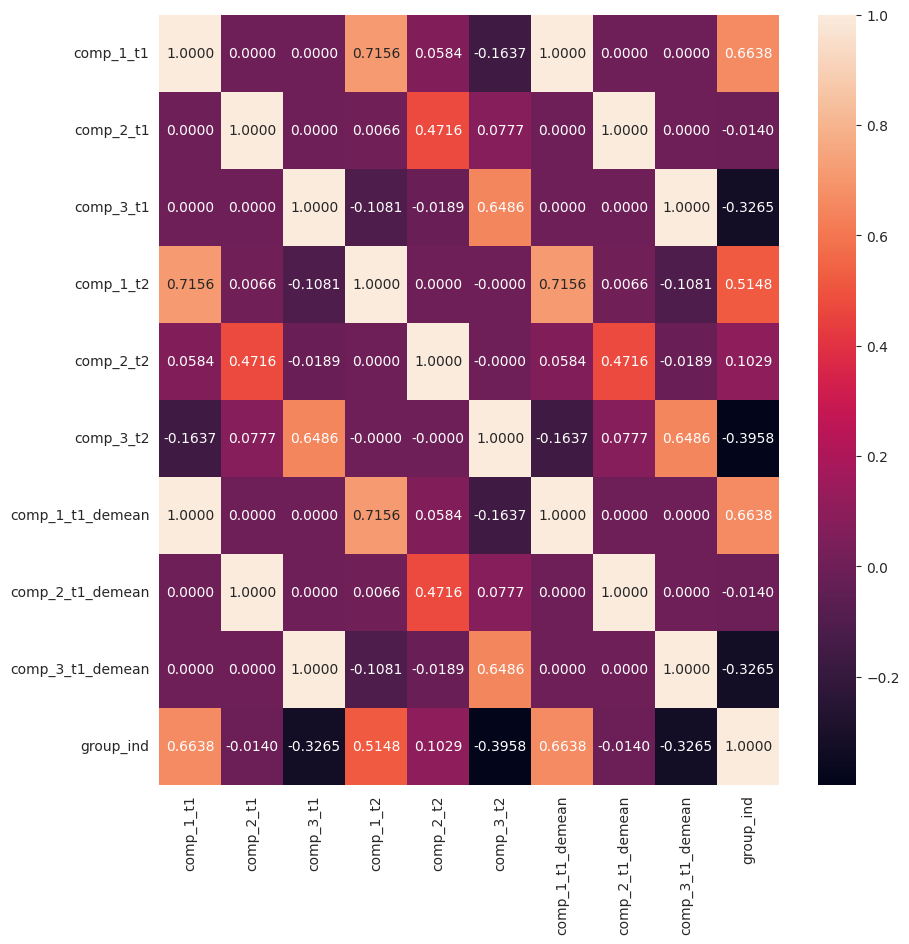

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(pca_df[['comp_1_t1','comp_2_t1', 'comp_3_t1', 'comp_1_t2', 'comp_2_t2', 'comp_3_t2', 'comp_1_t1_demean', 'comp_2_t1_demean', 'comp_3_t1_demean','group_ind']].corr(),  annot=True,  fmt=".4f")

## Section 3 the KDE and the trace plots for linear regressions at time point one 

comp_1 

comp_2 

comp_3 



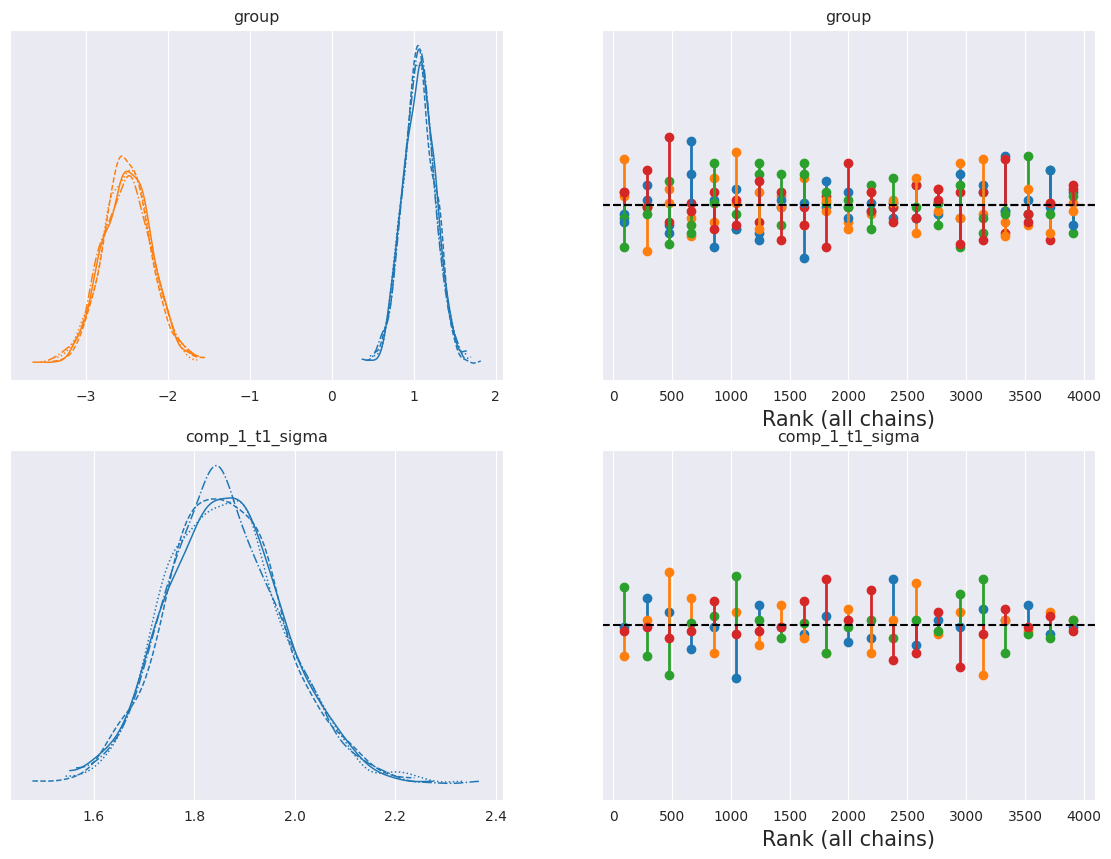

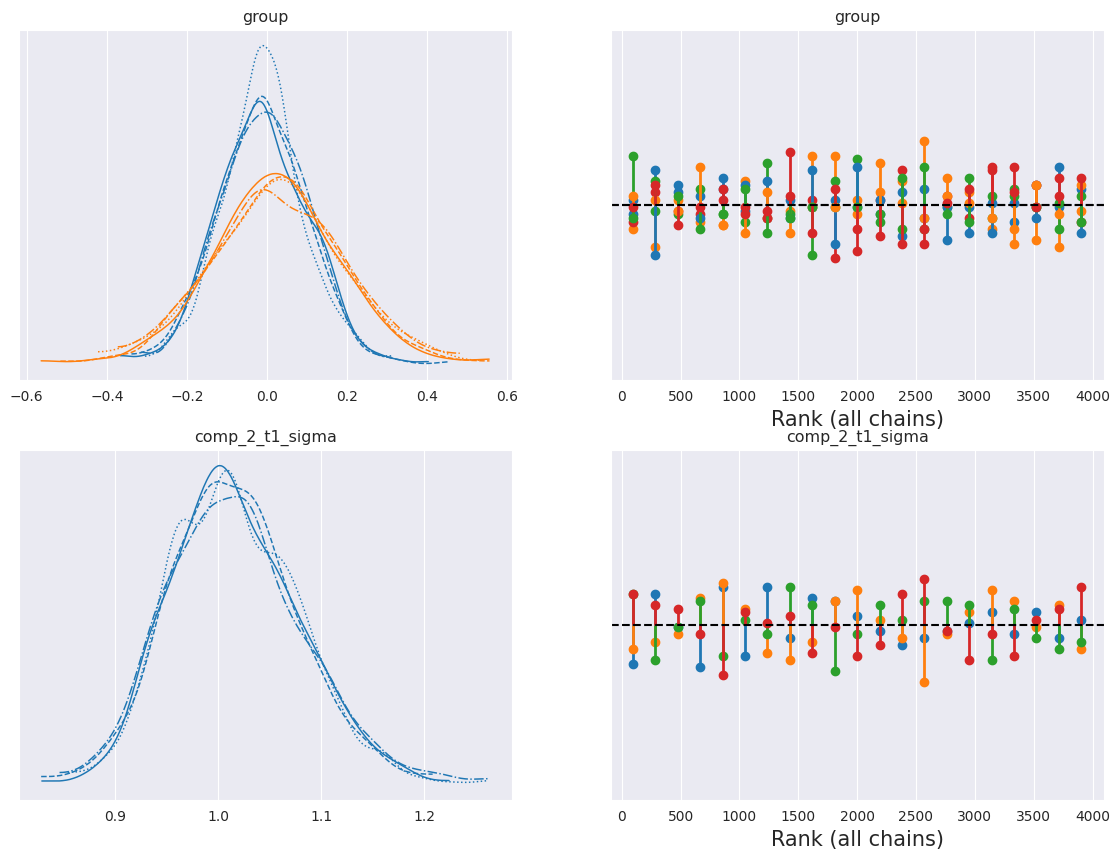

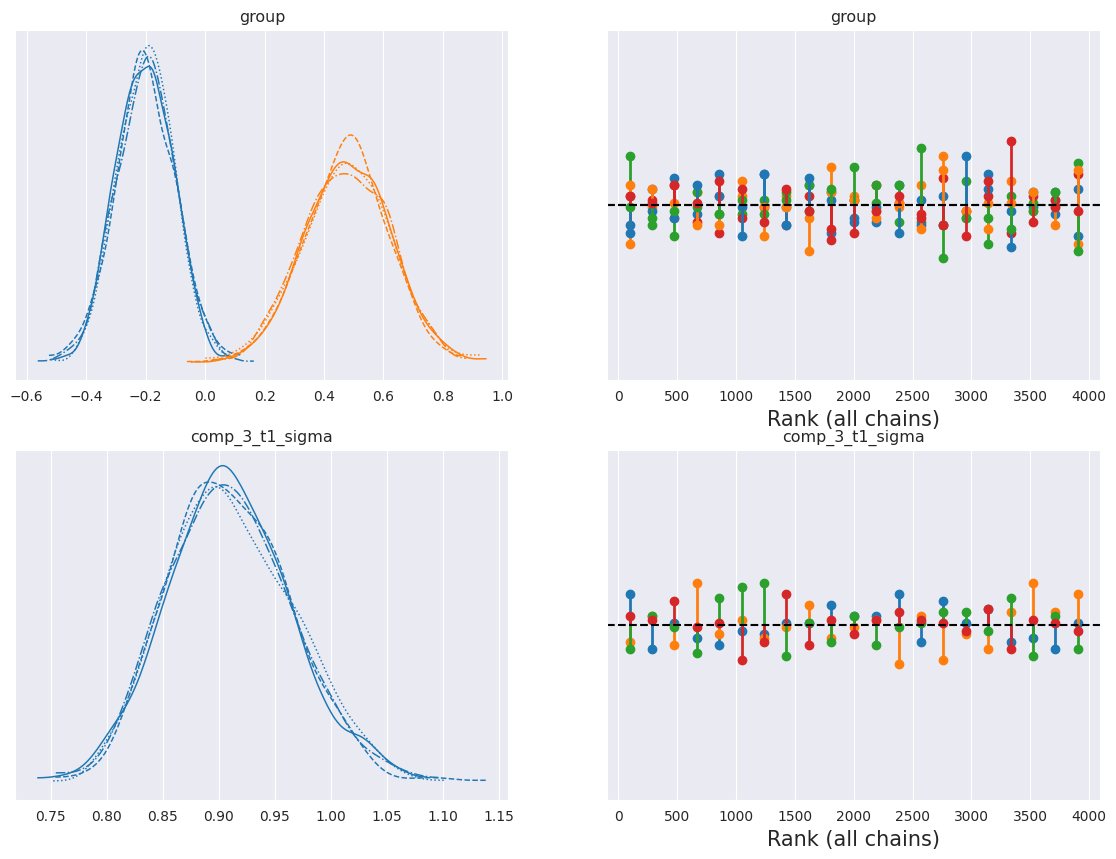

In [22]:
for model in t1_models.keys():
    print(model, '\n')
    az.plot_trace(t1_models[model], kind="rank_vlines", figsize=(14,10))

## Section 4 KDE and trace plots for mixed effects models

Plotting the KDE and the trace plots for the alternative model.

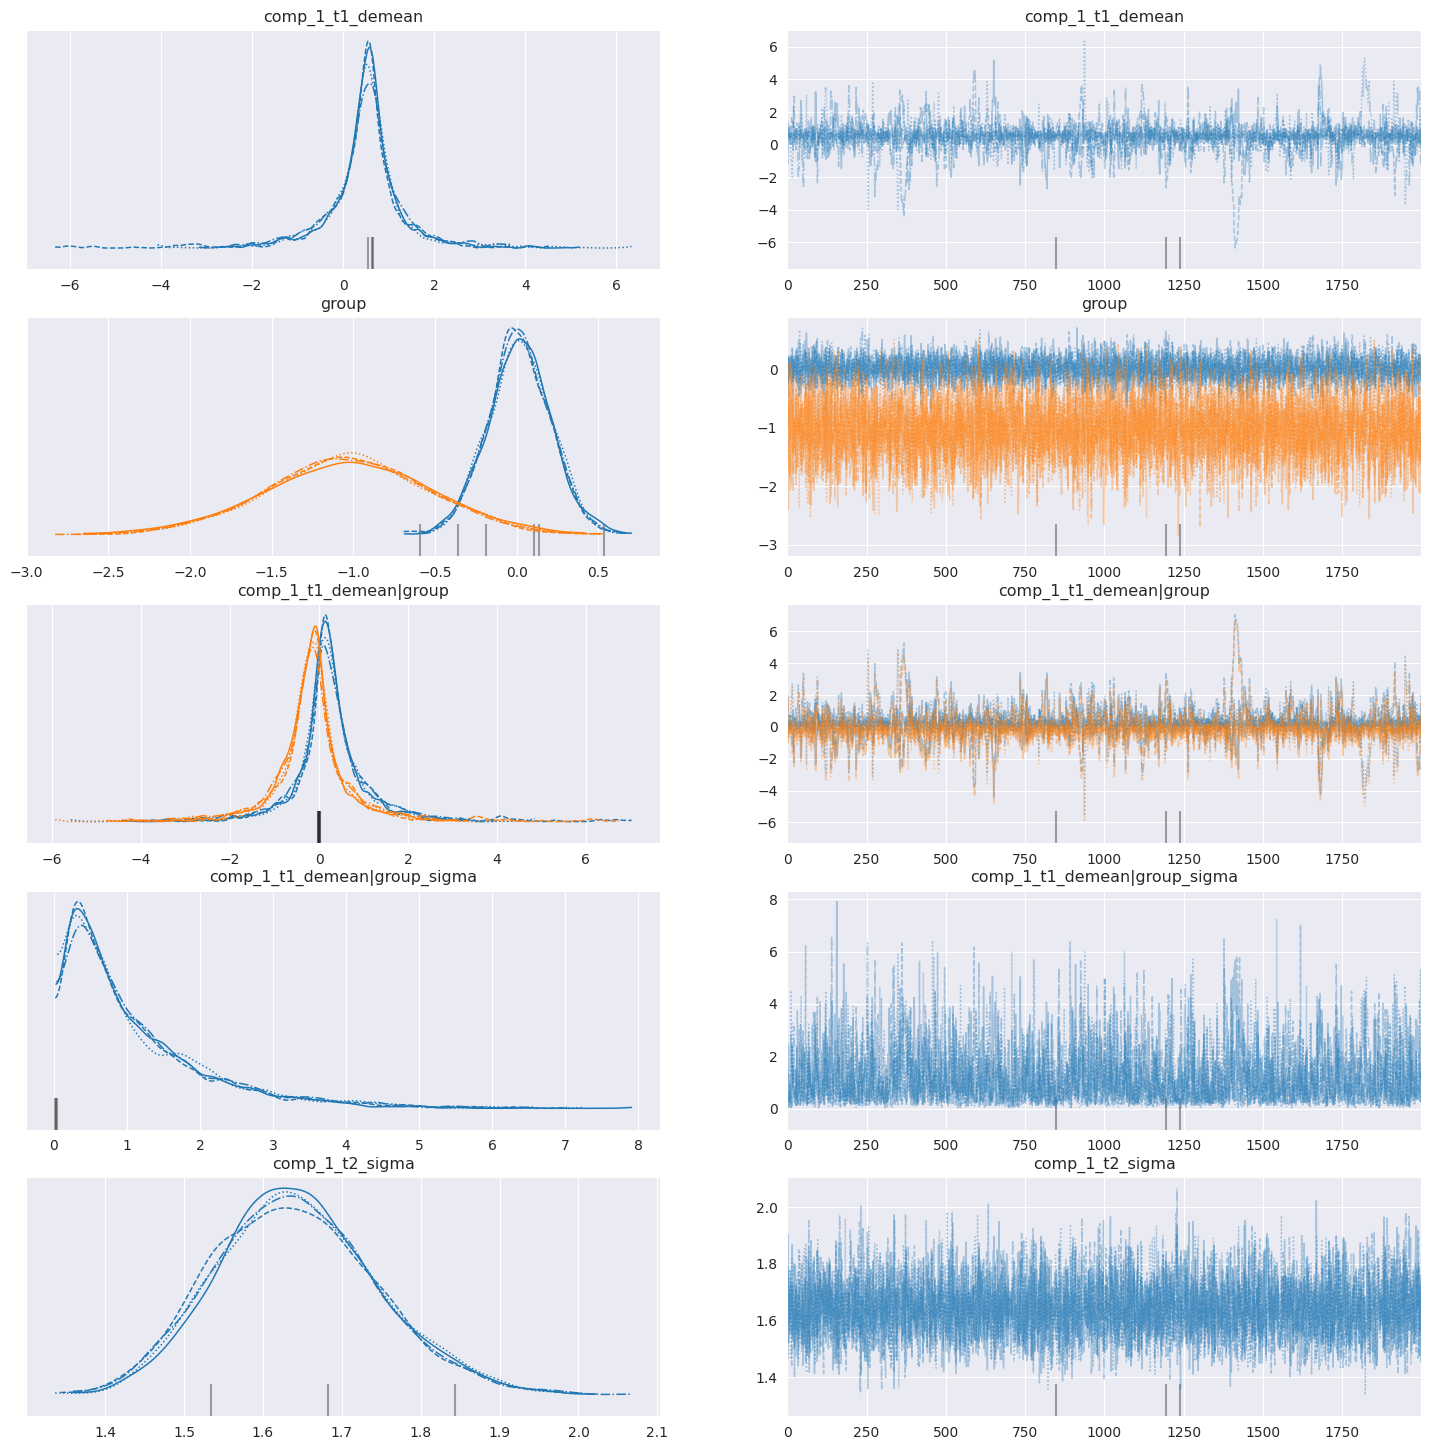

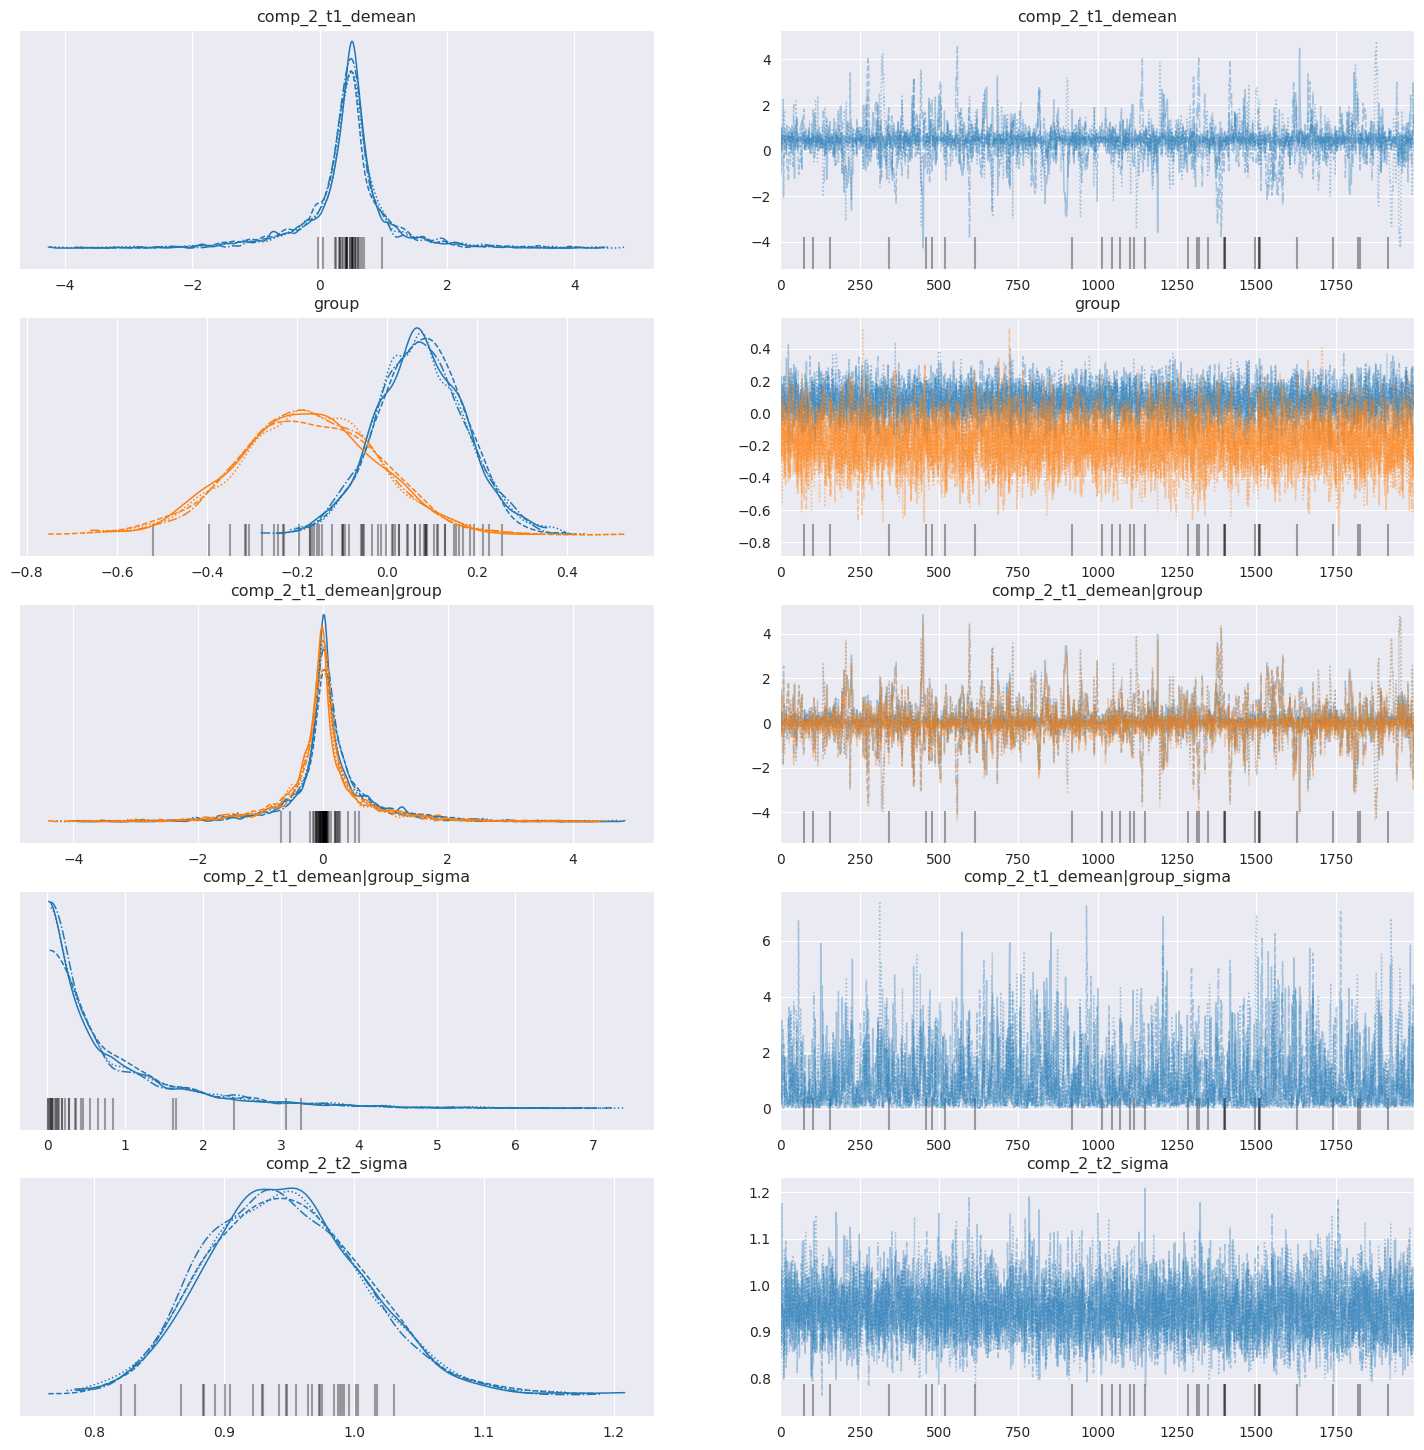

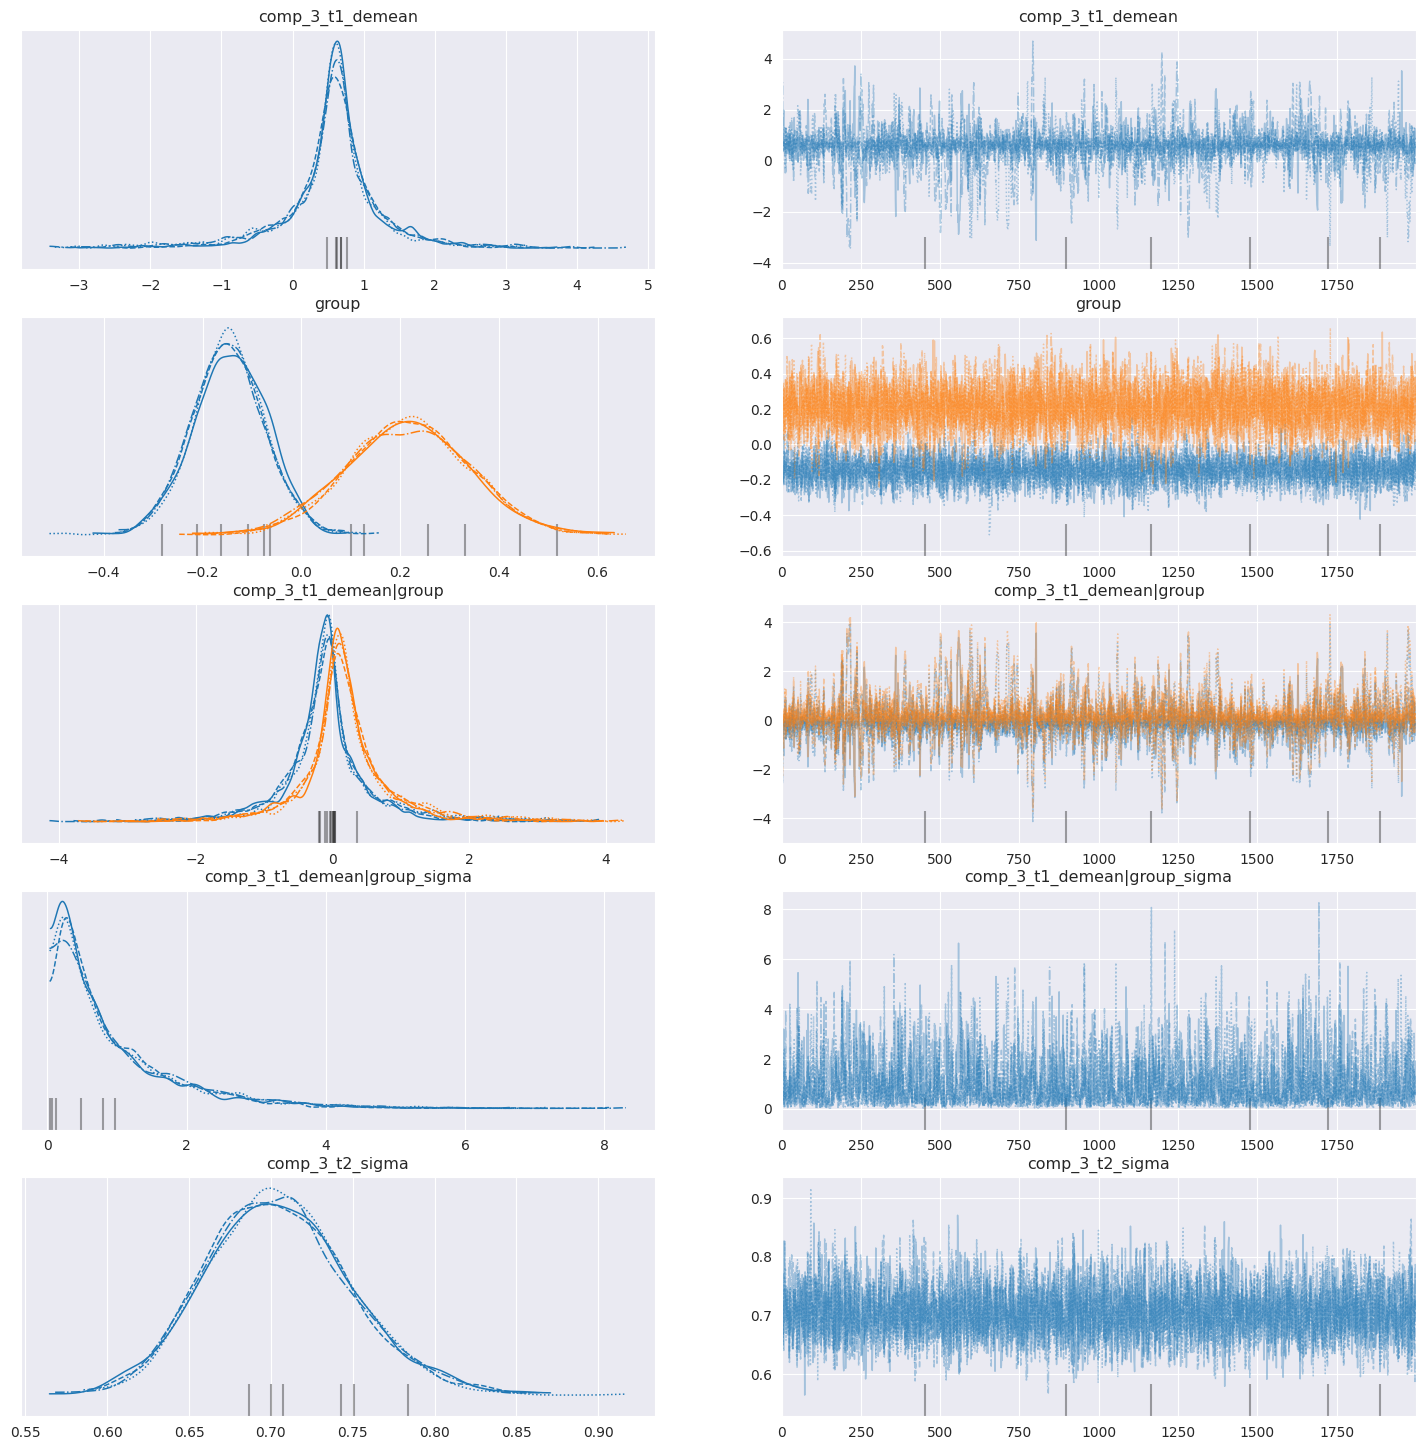

In [14]:
for model in comp:
    az.plot_trace(fitted_models['alternative'][model], figsize=(18,18))

Plotting the KDE and trace plots for the null hypothesis models

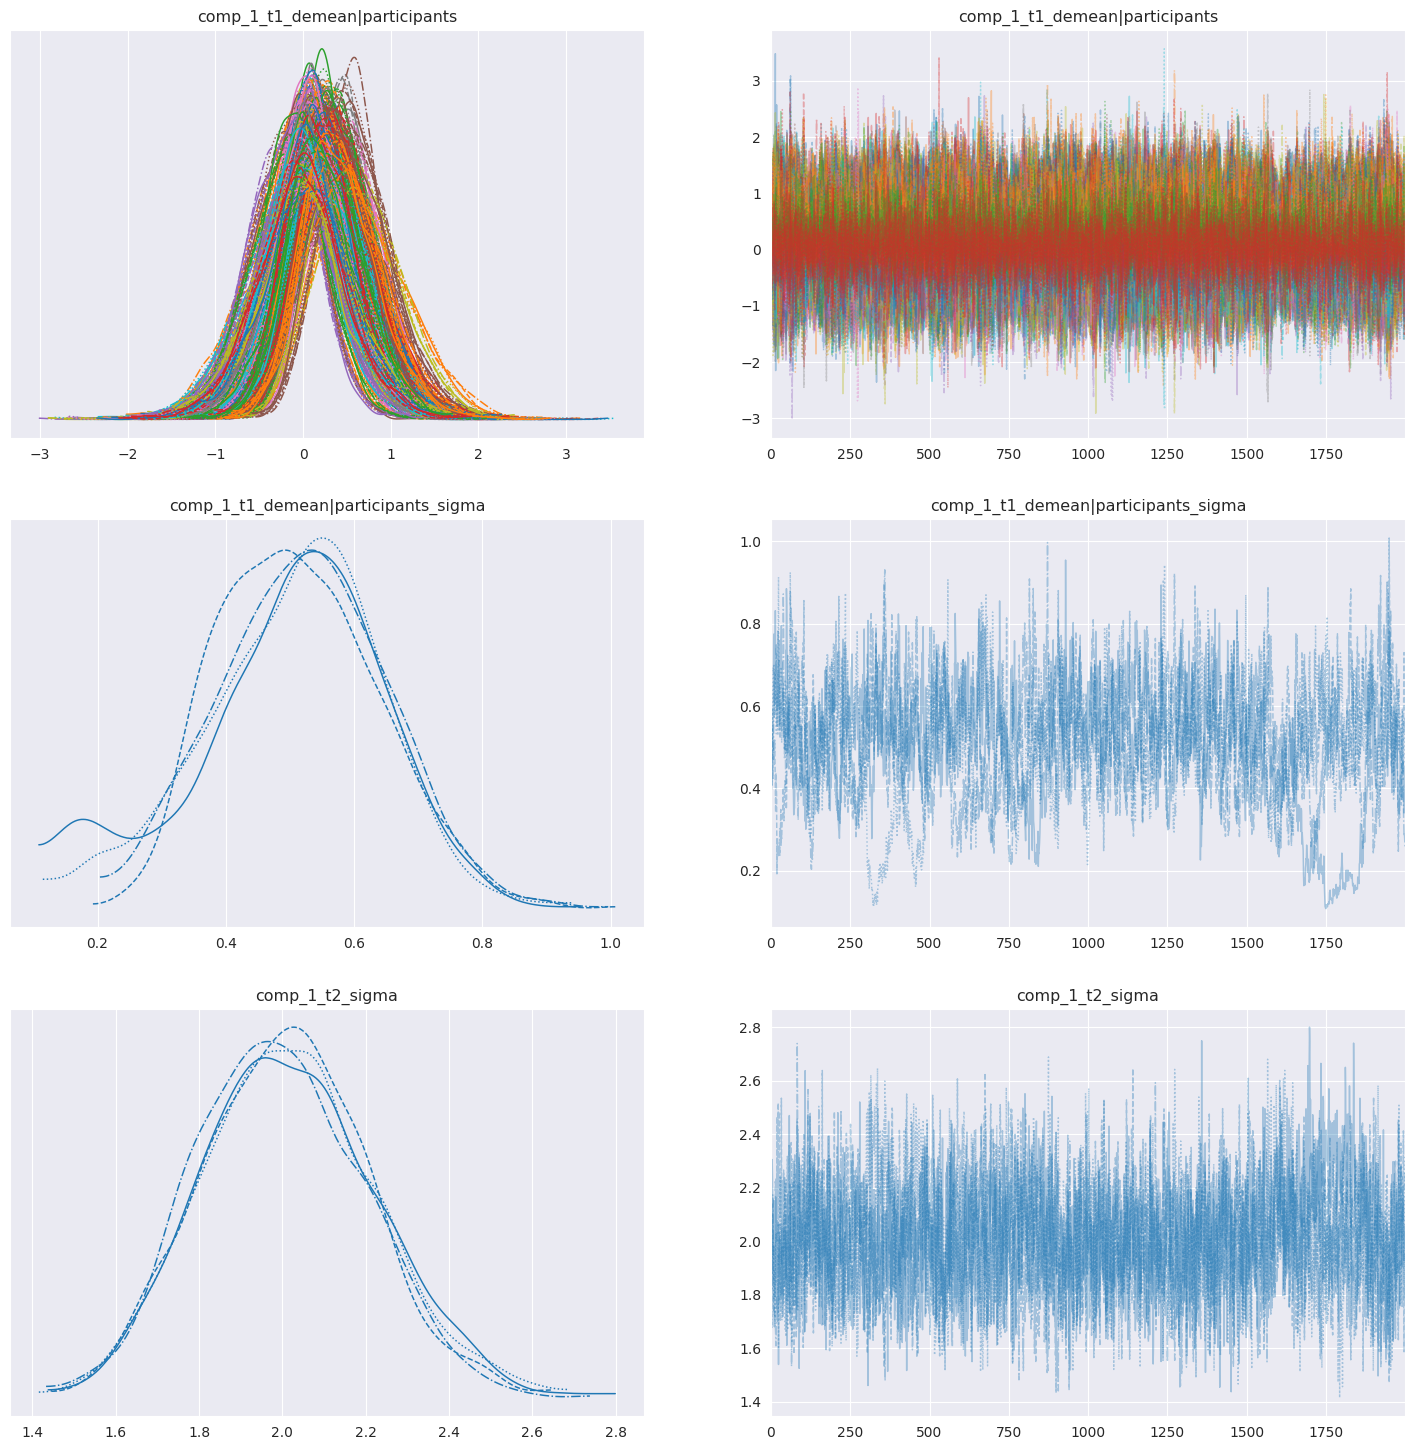

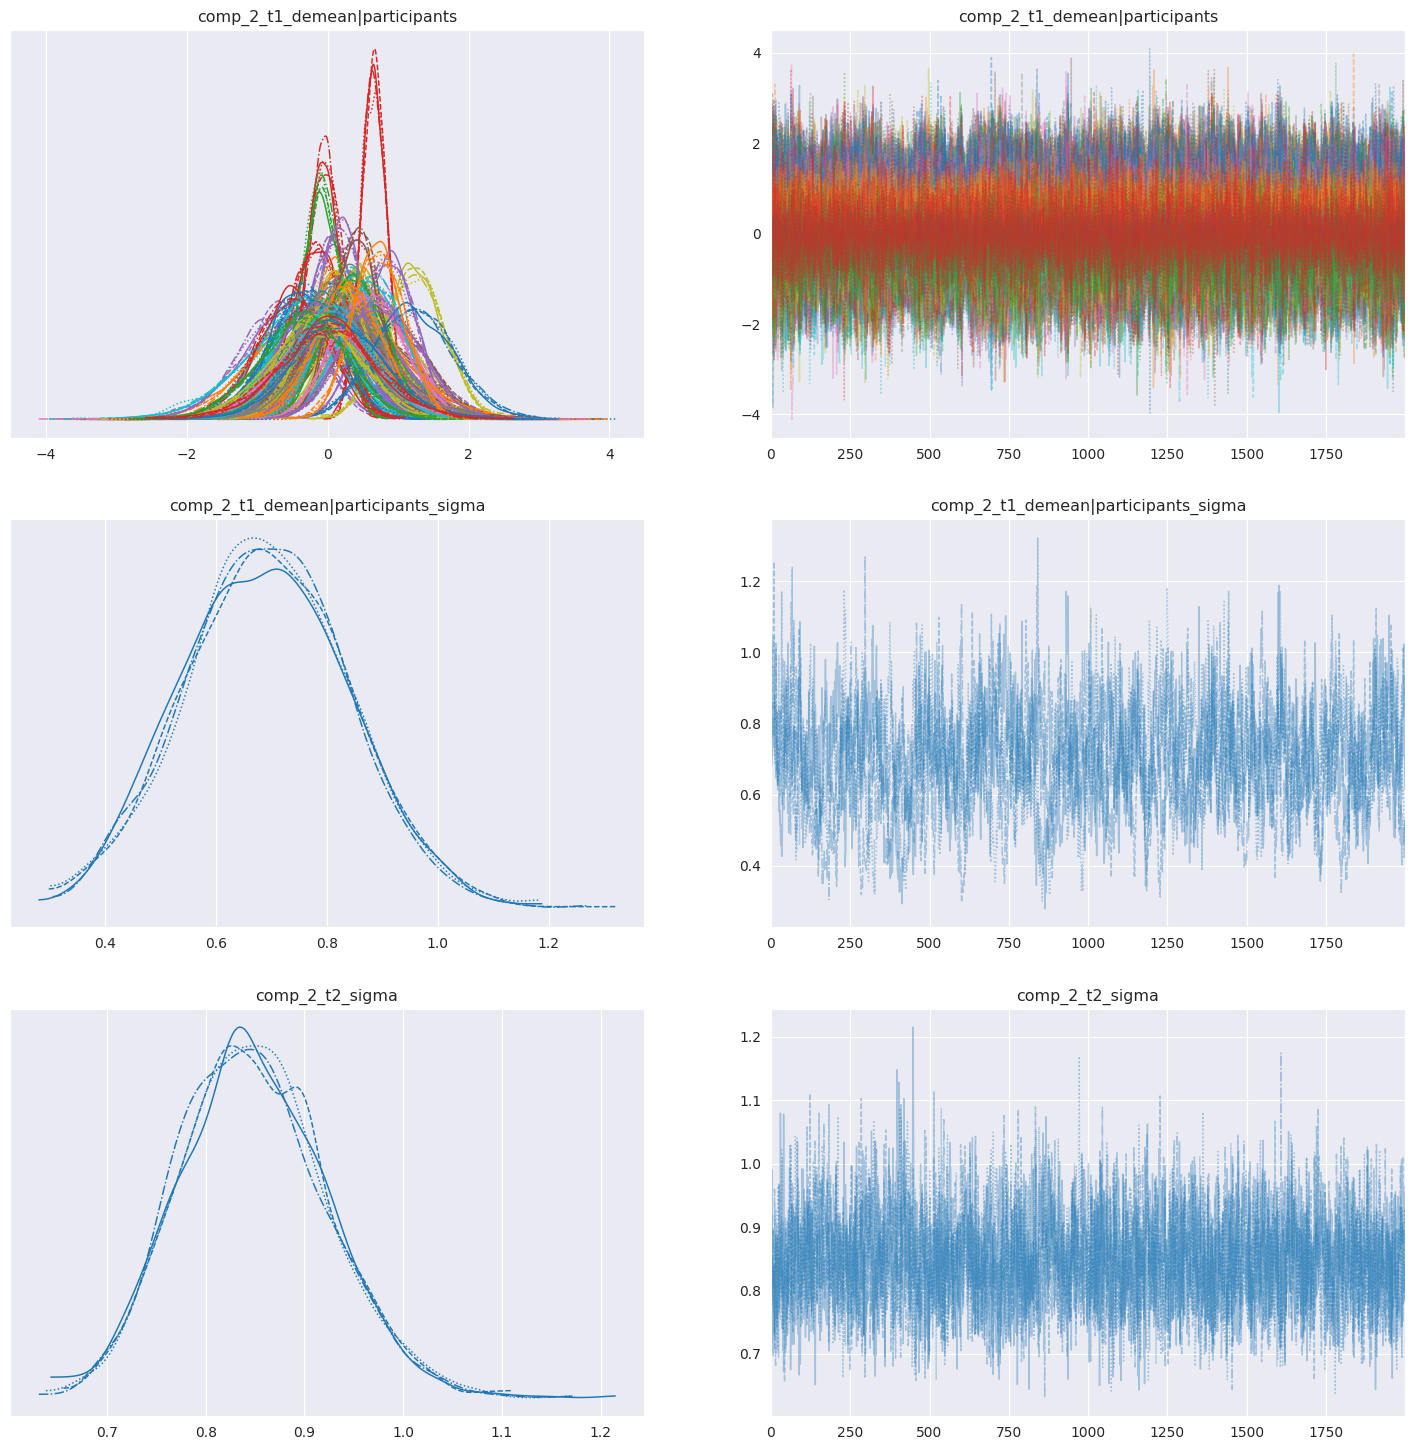

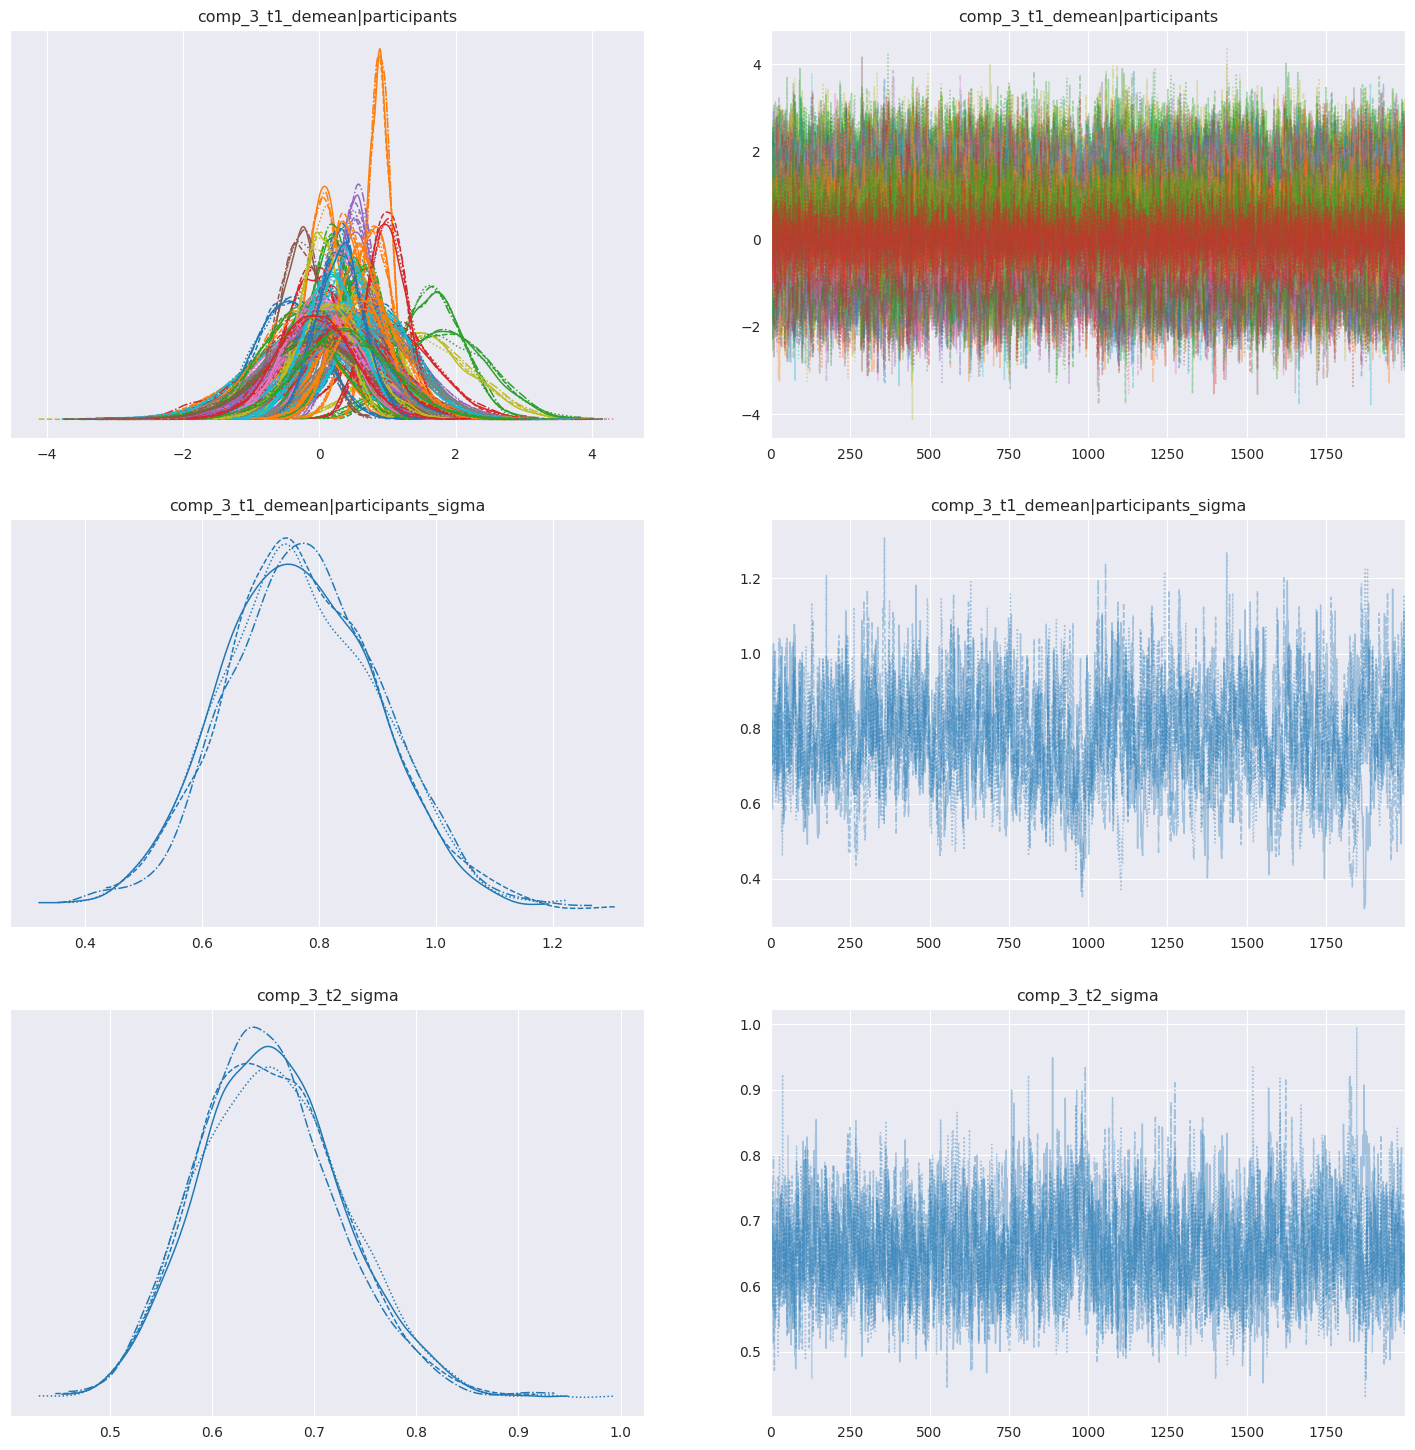

In [15]:
for model in comp:
    az.plot_trace(fitted_models['null'][model], figsize=(18,18))

## Section 4 Autocorrelation plots

autocorrelation plots for the alternative model

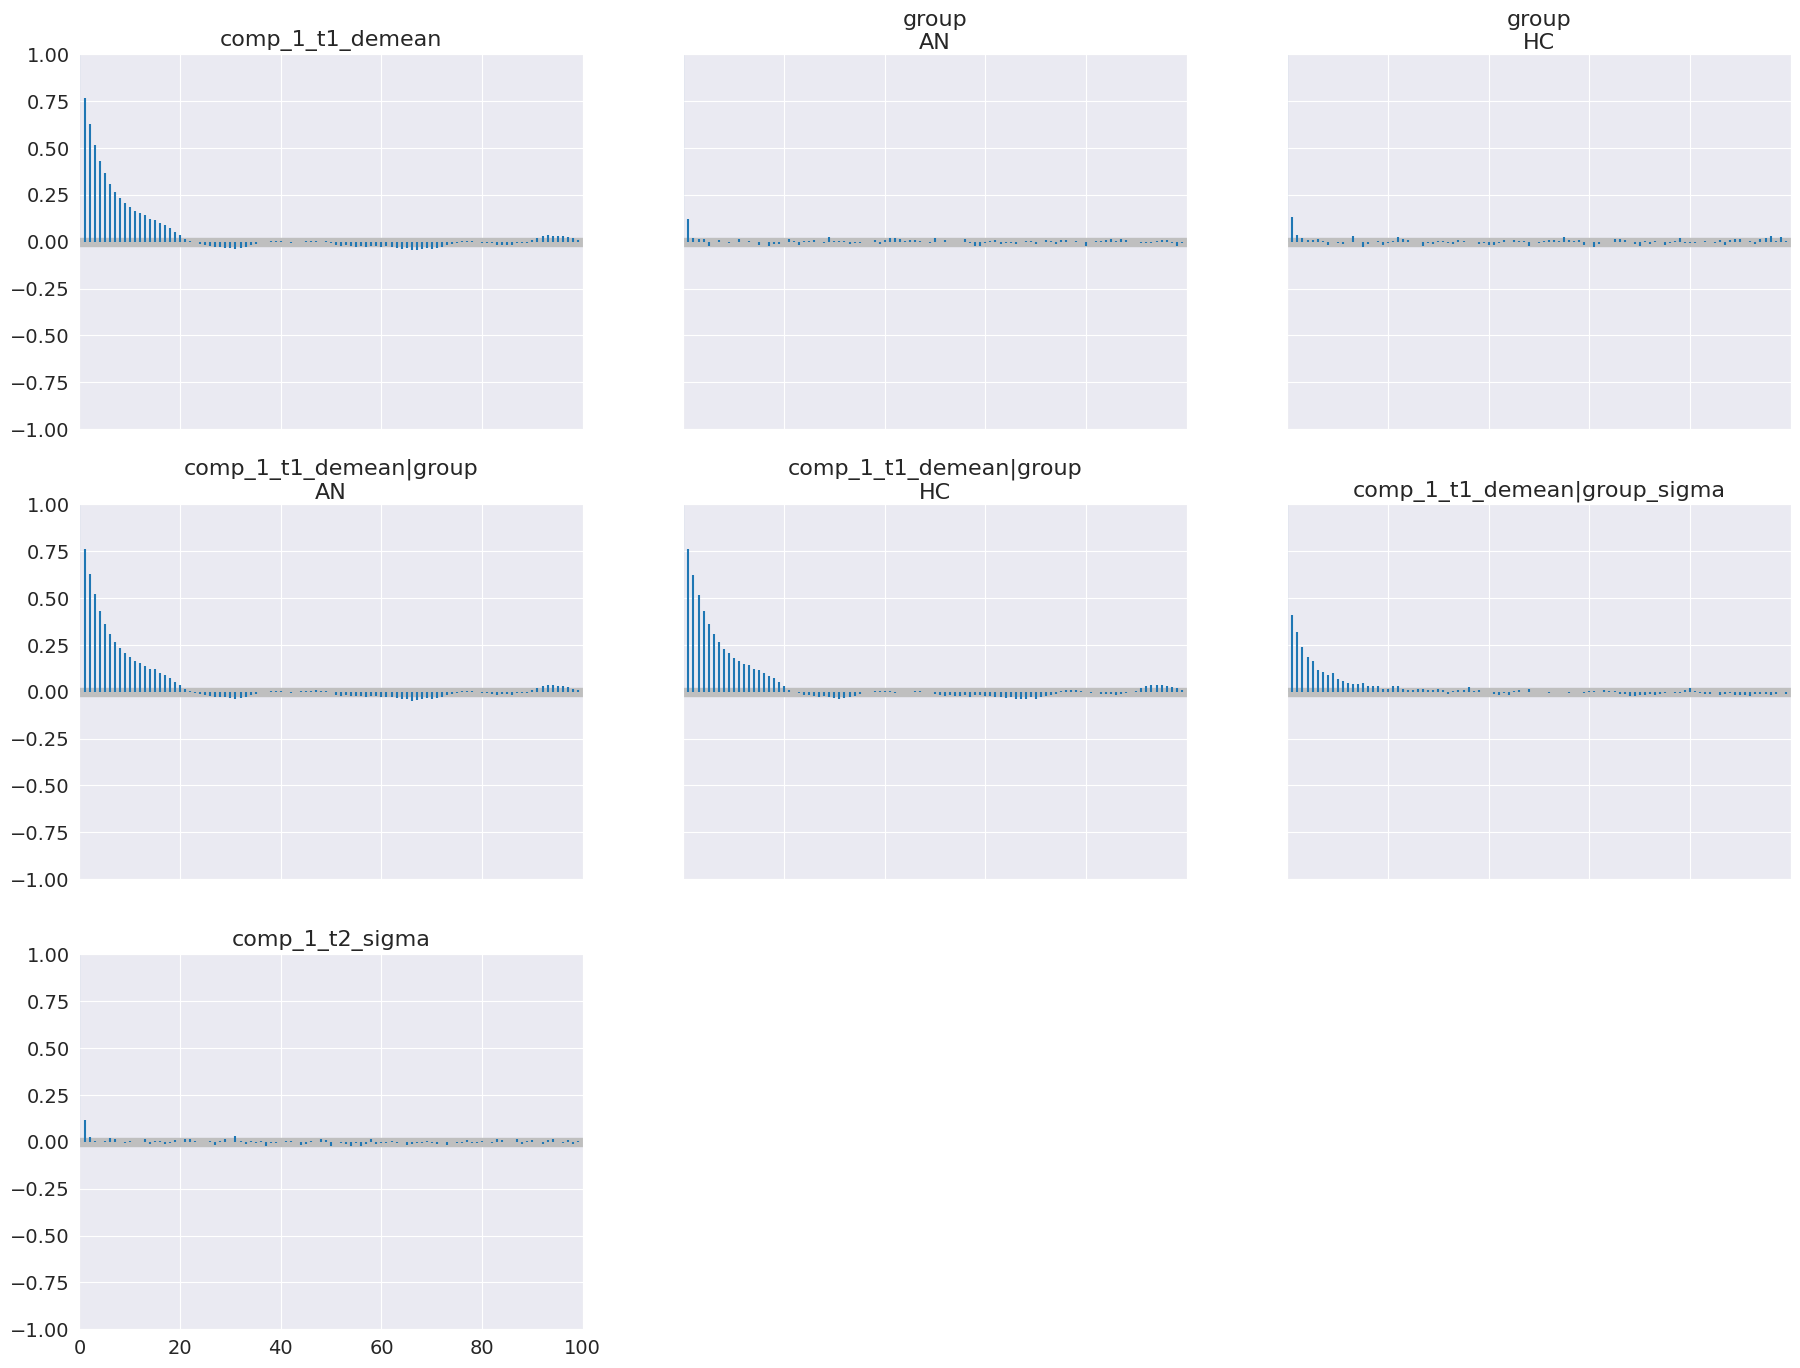

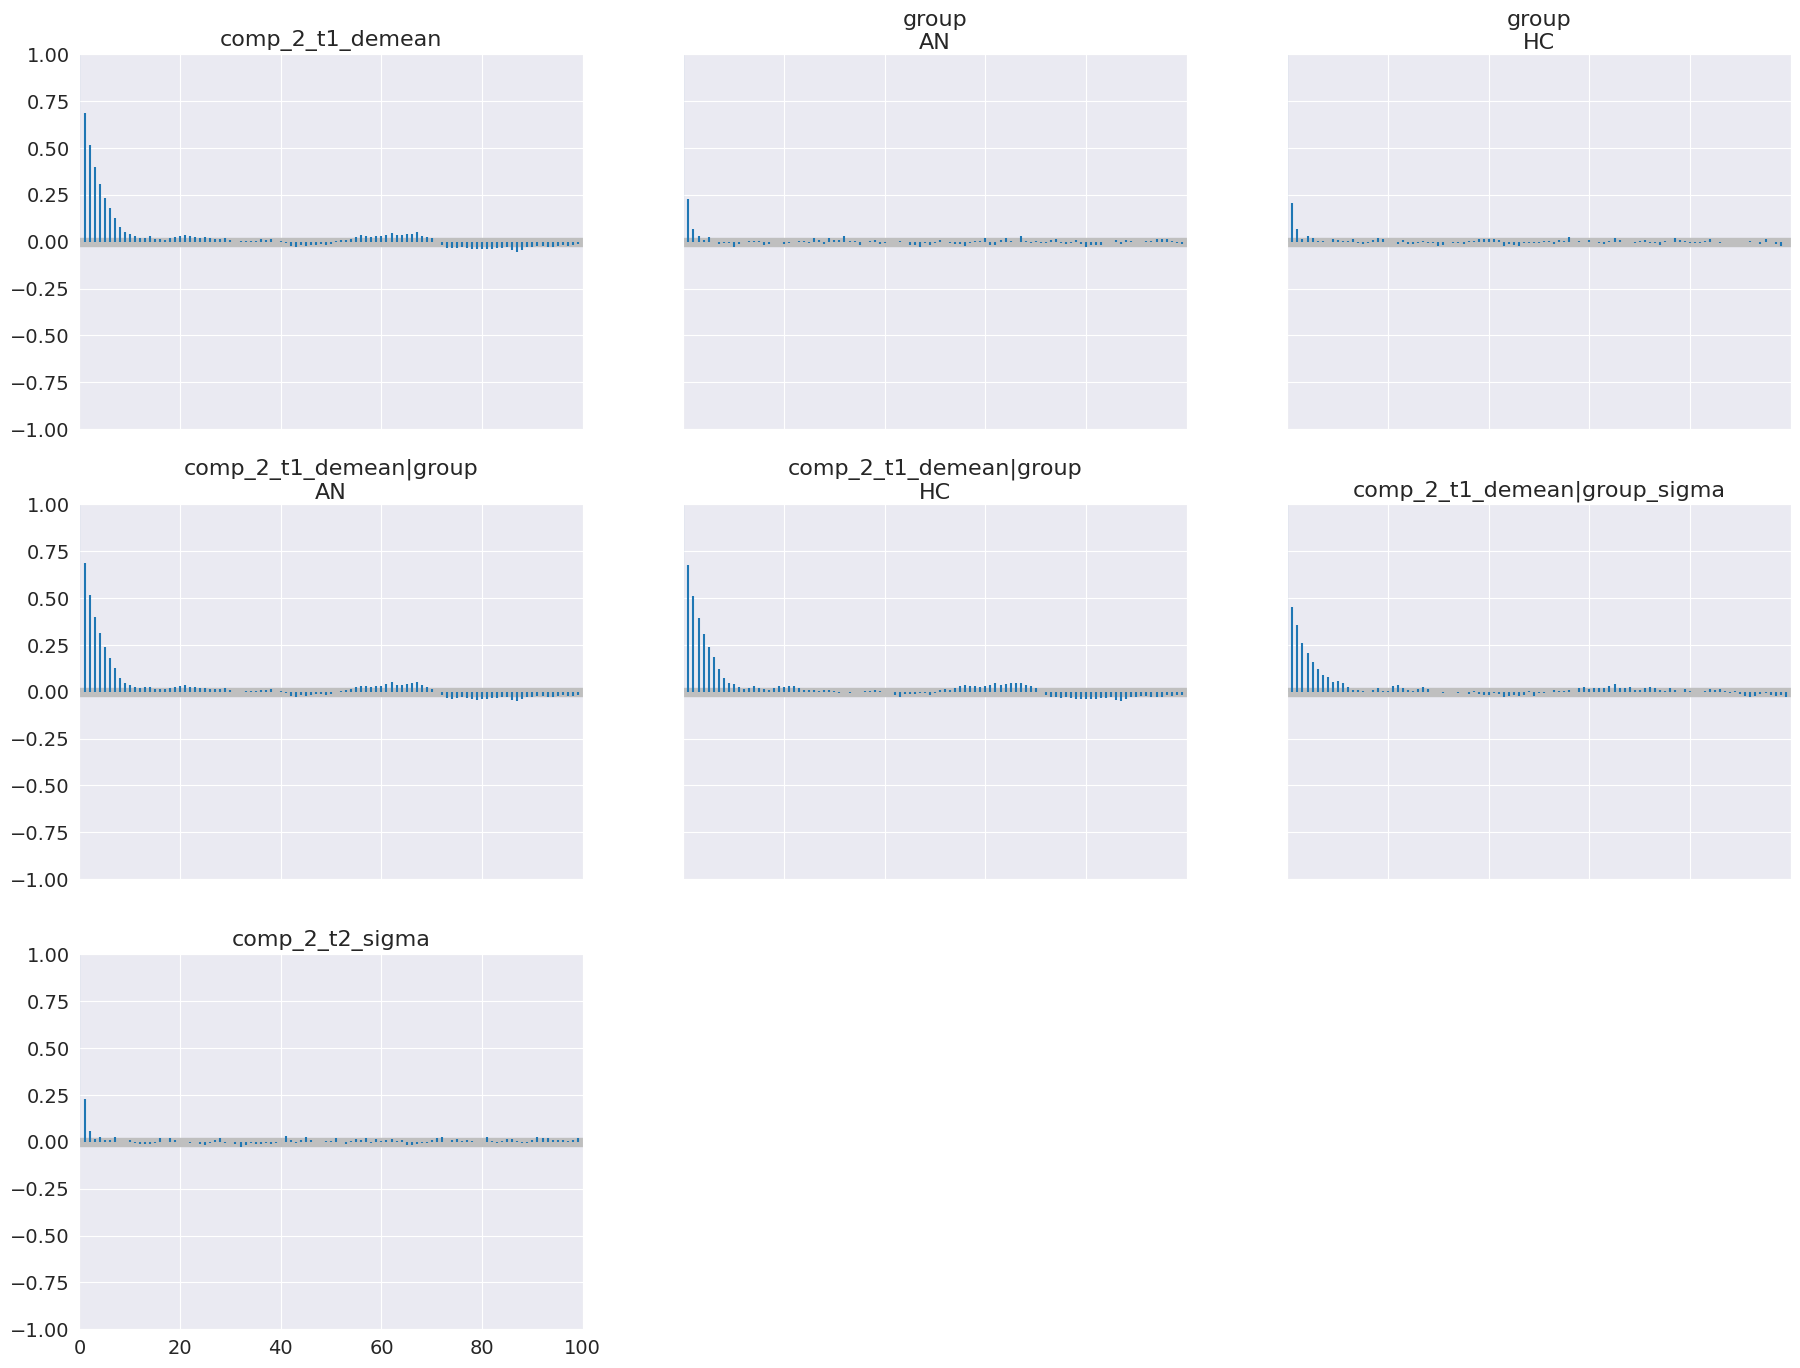

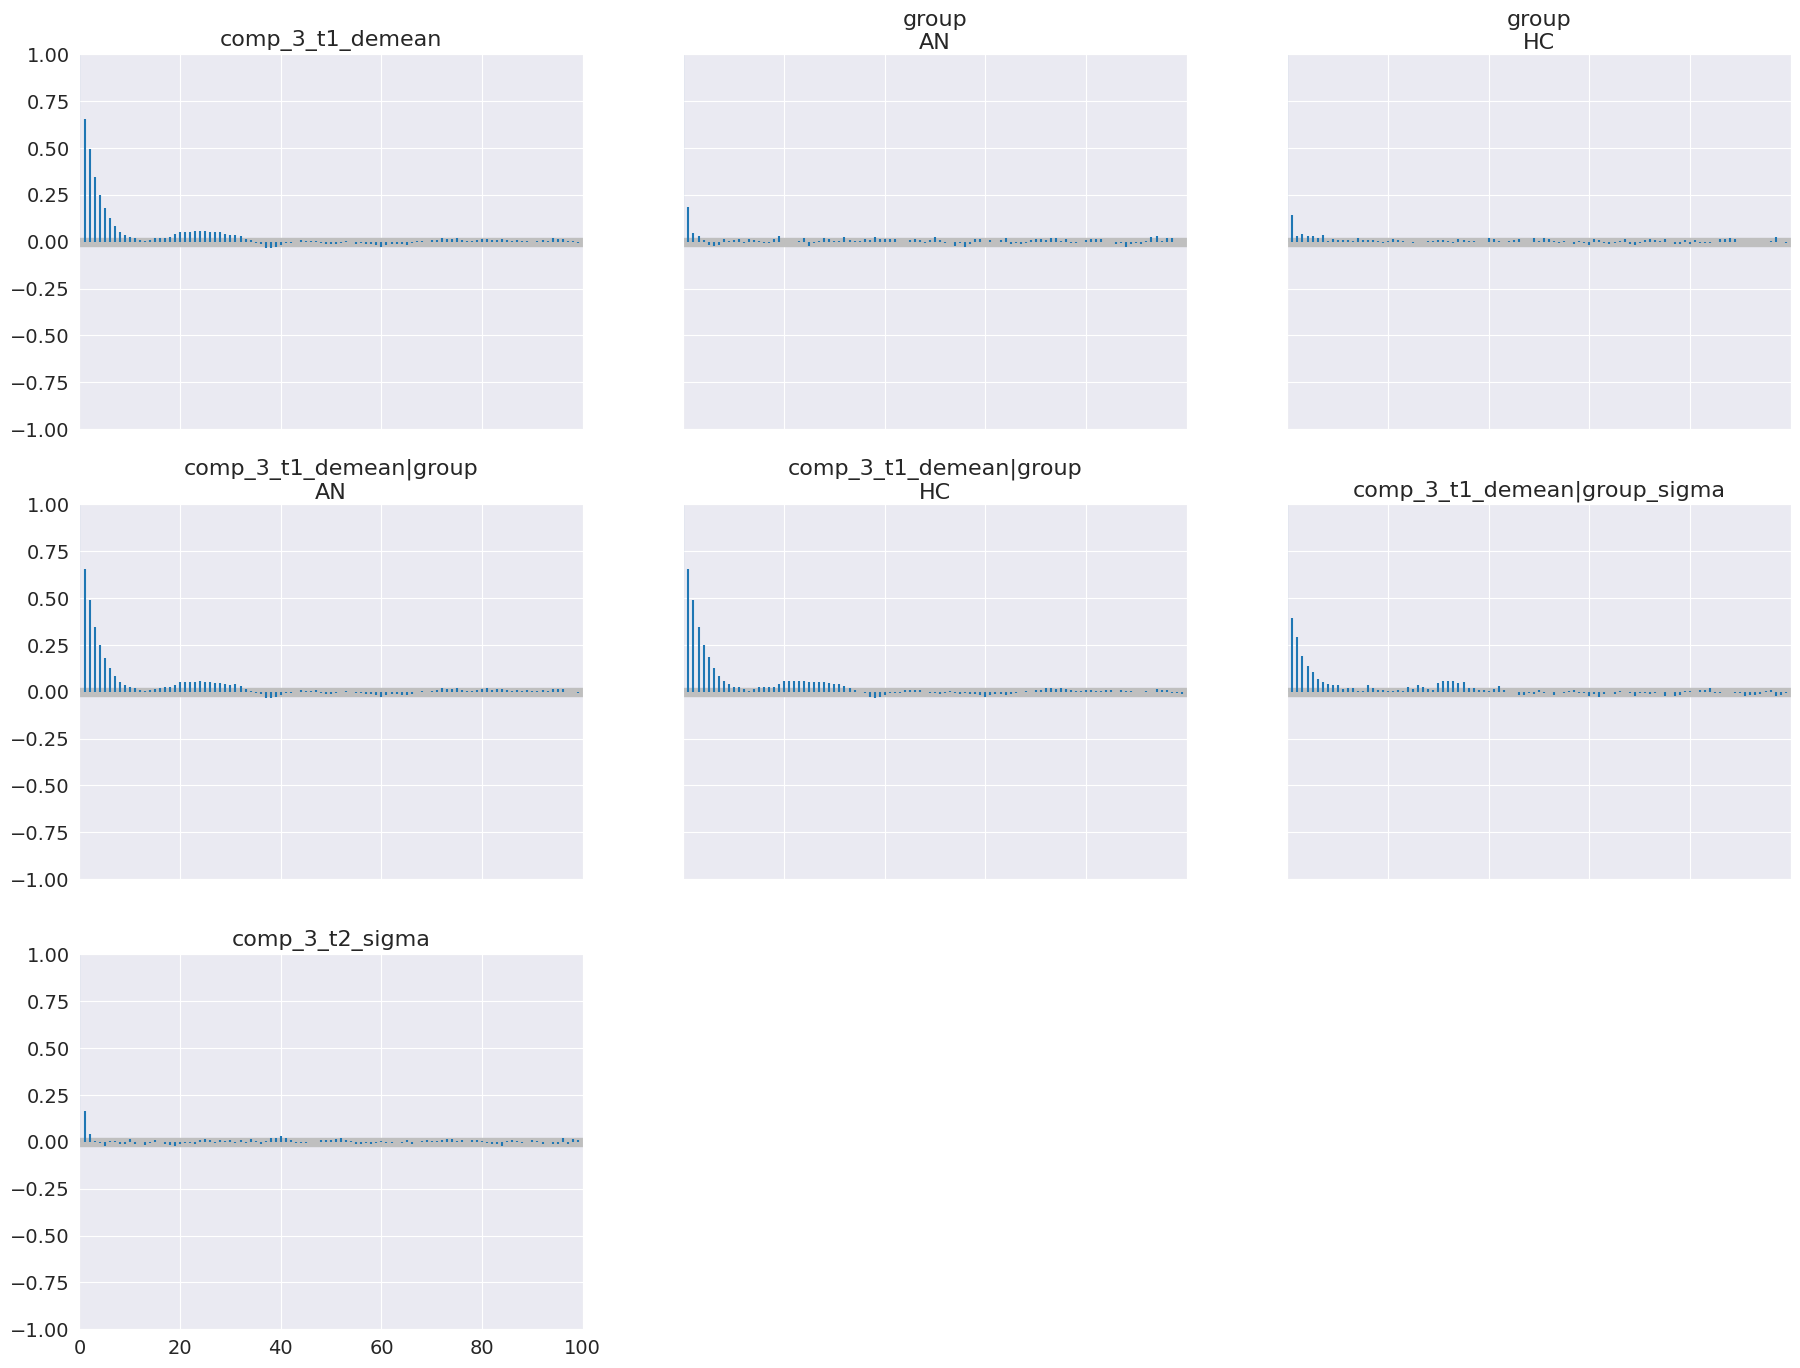

In [12]:
for model in comp:
    az.plot_autocorr(fitted_models['alternative'][model], combined=True)

Autocorrelation plots for null model

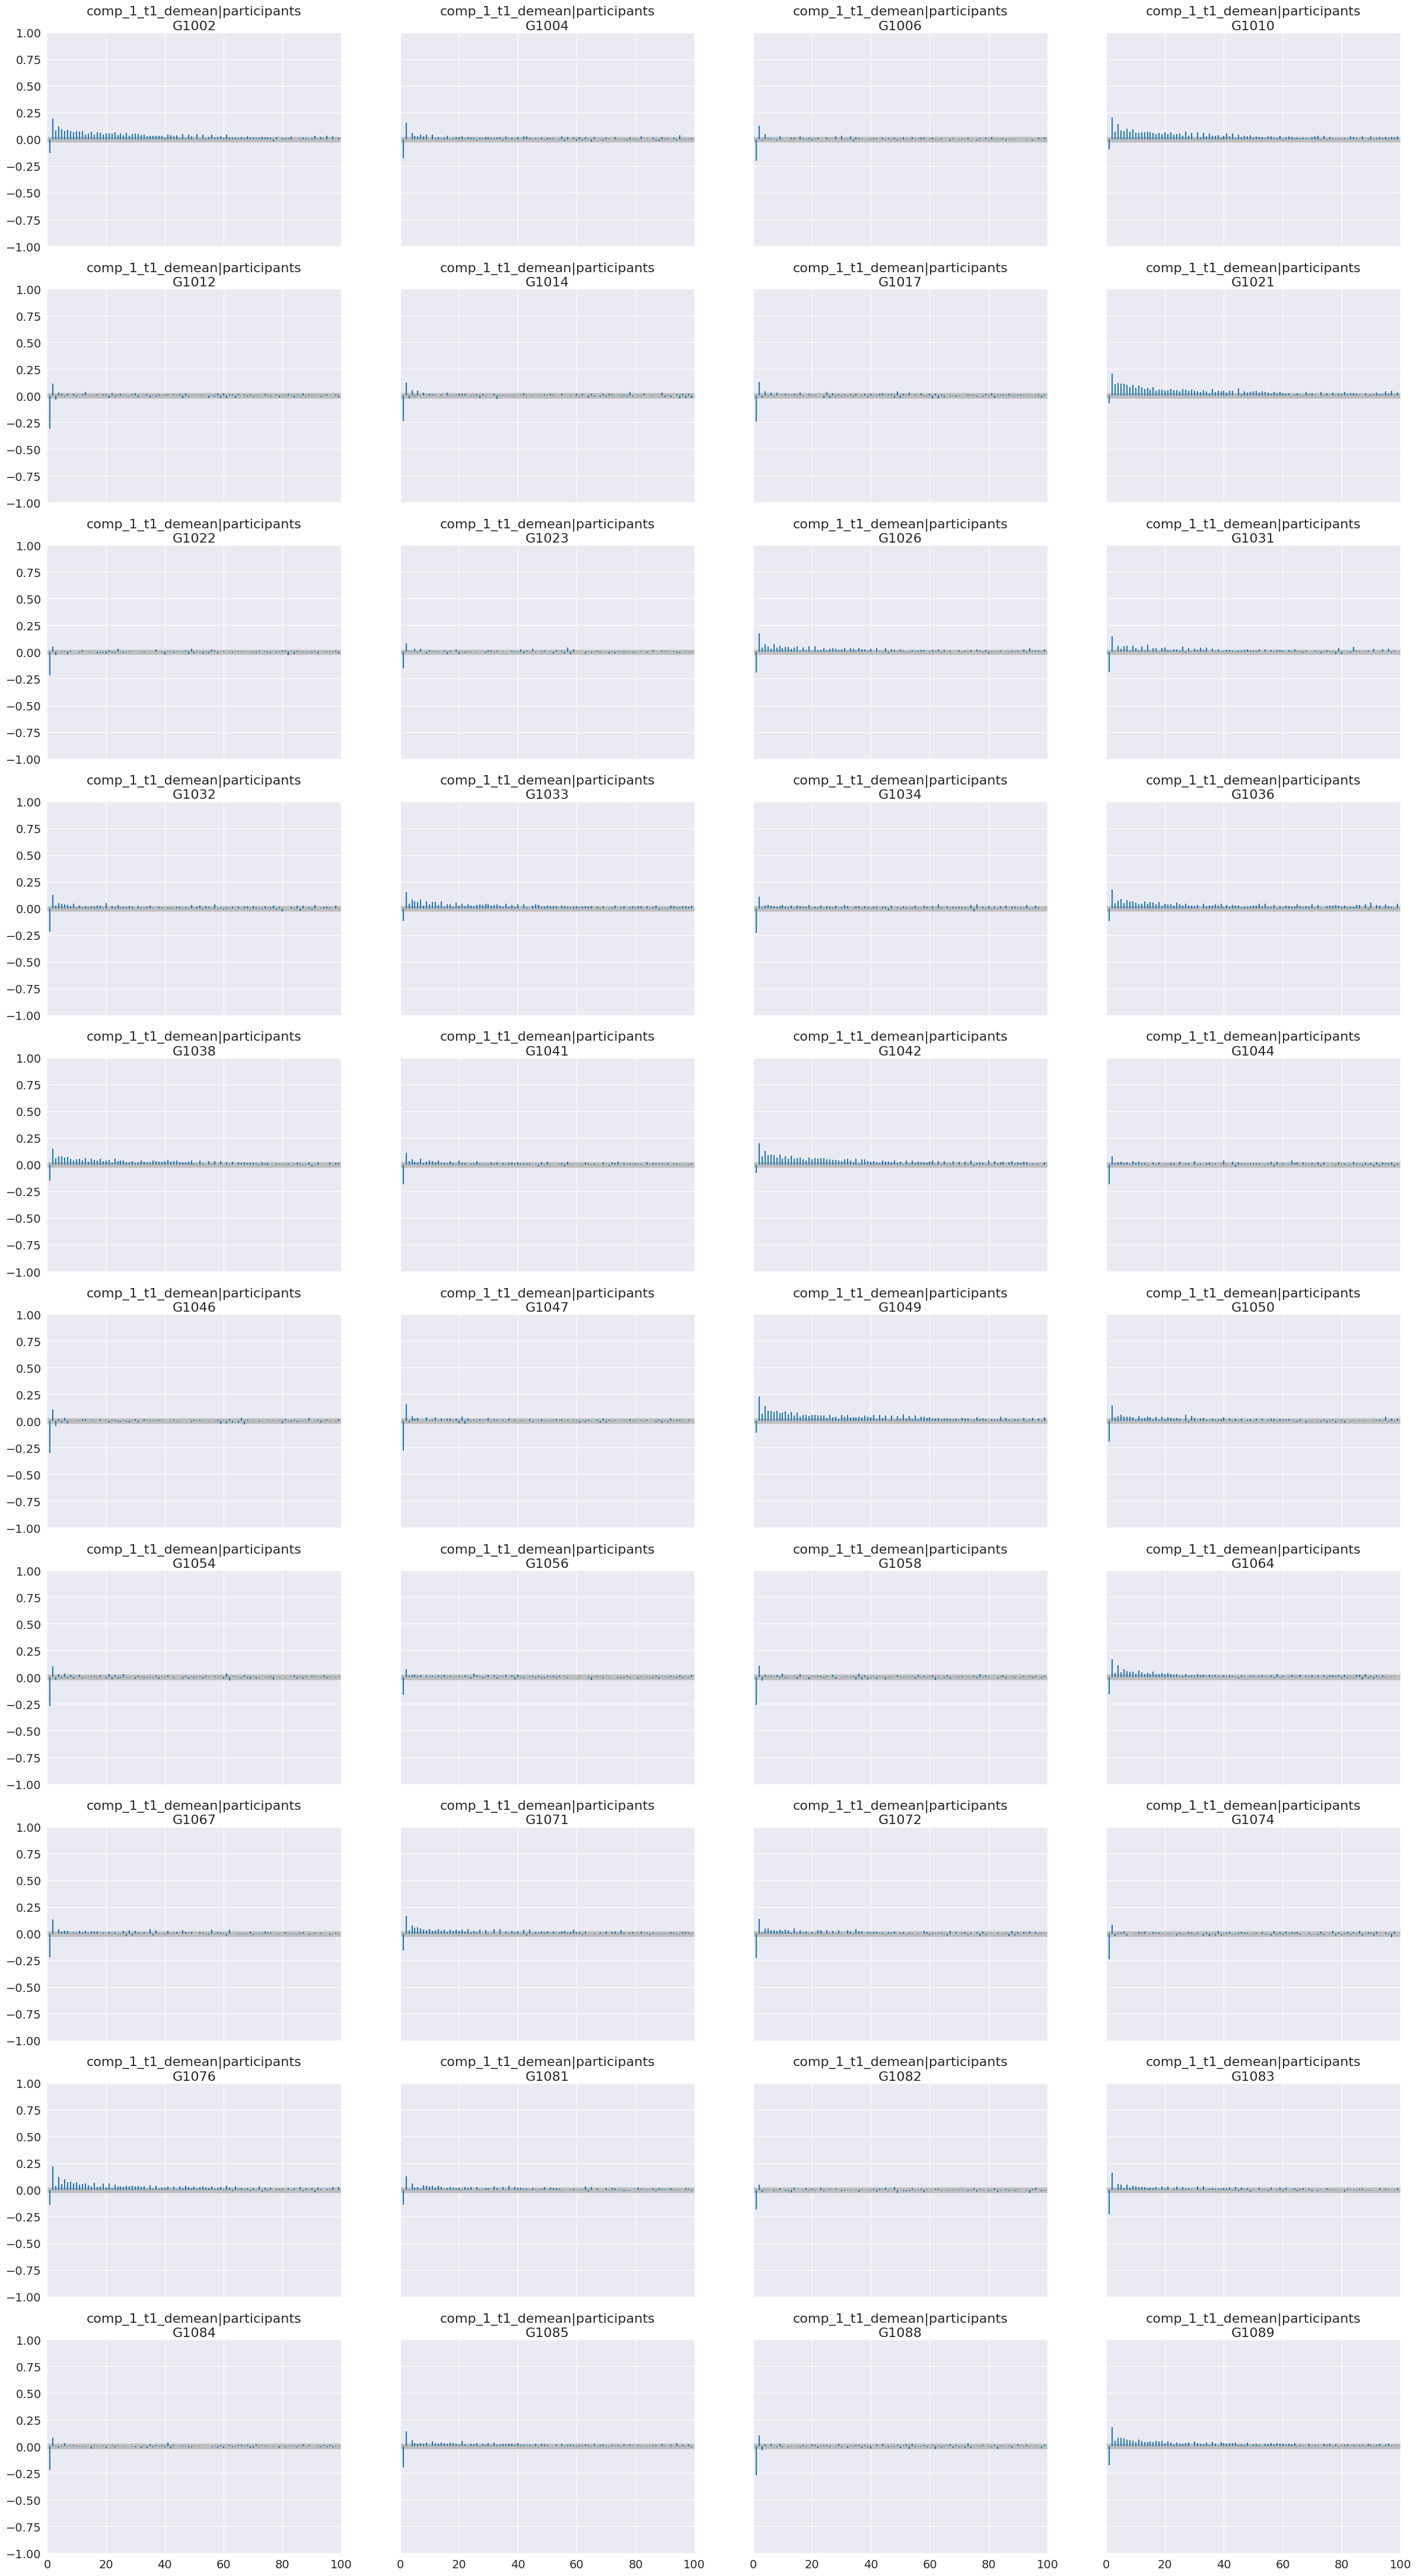

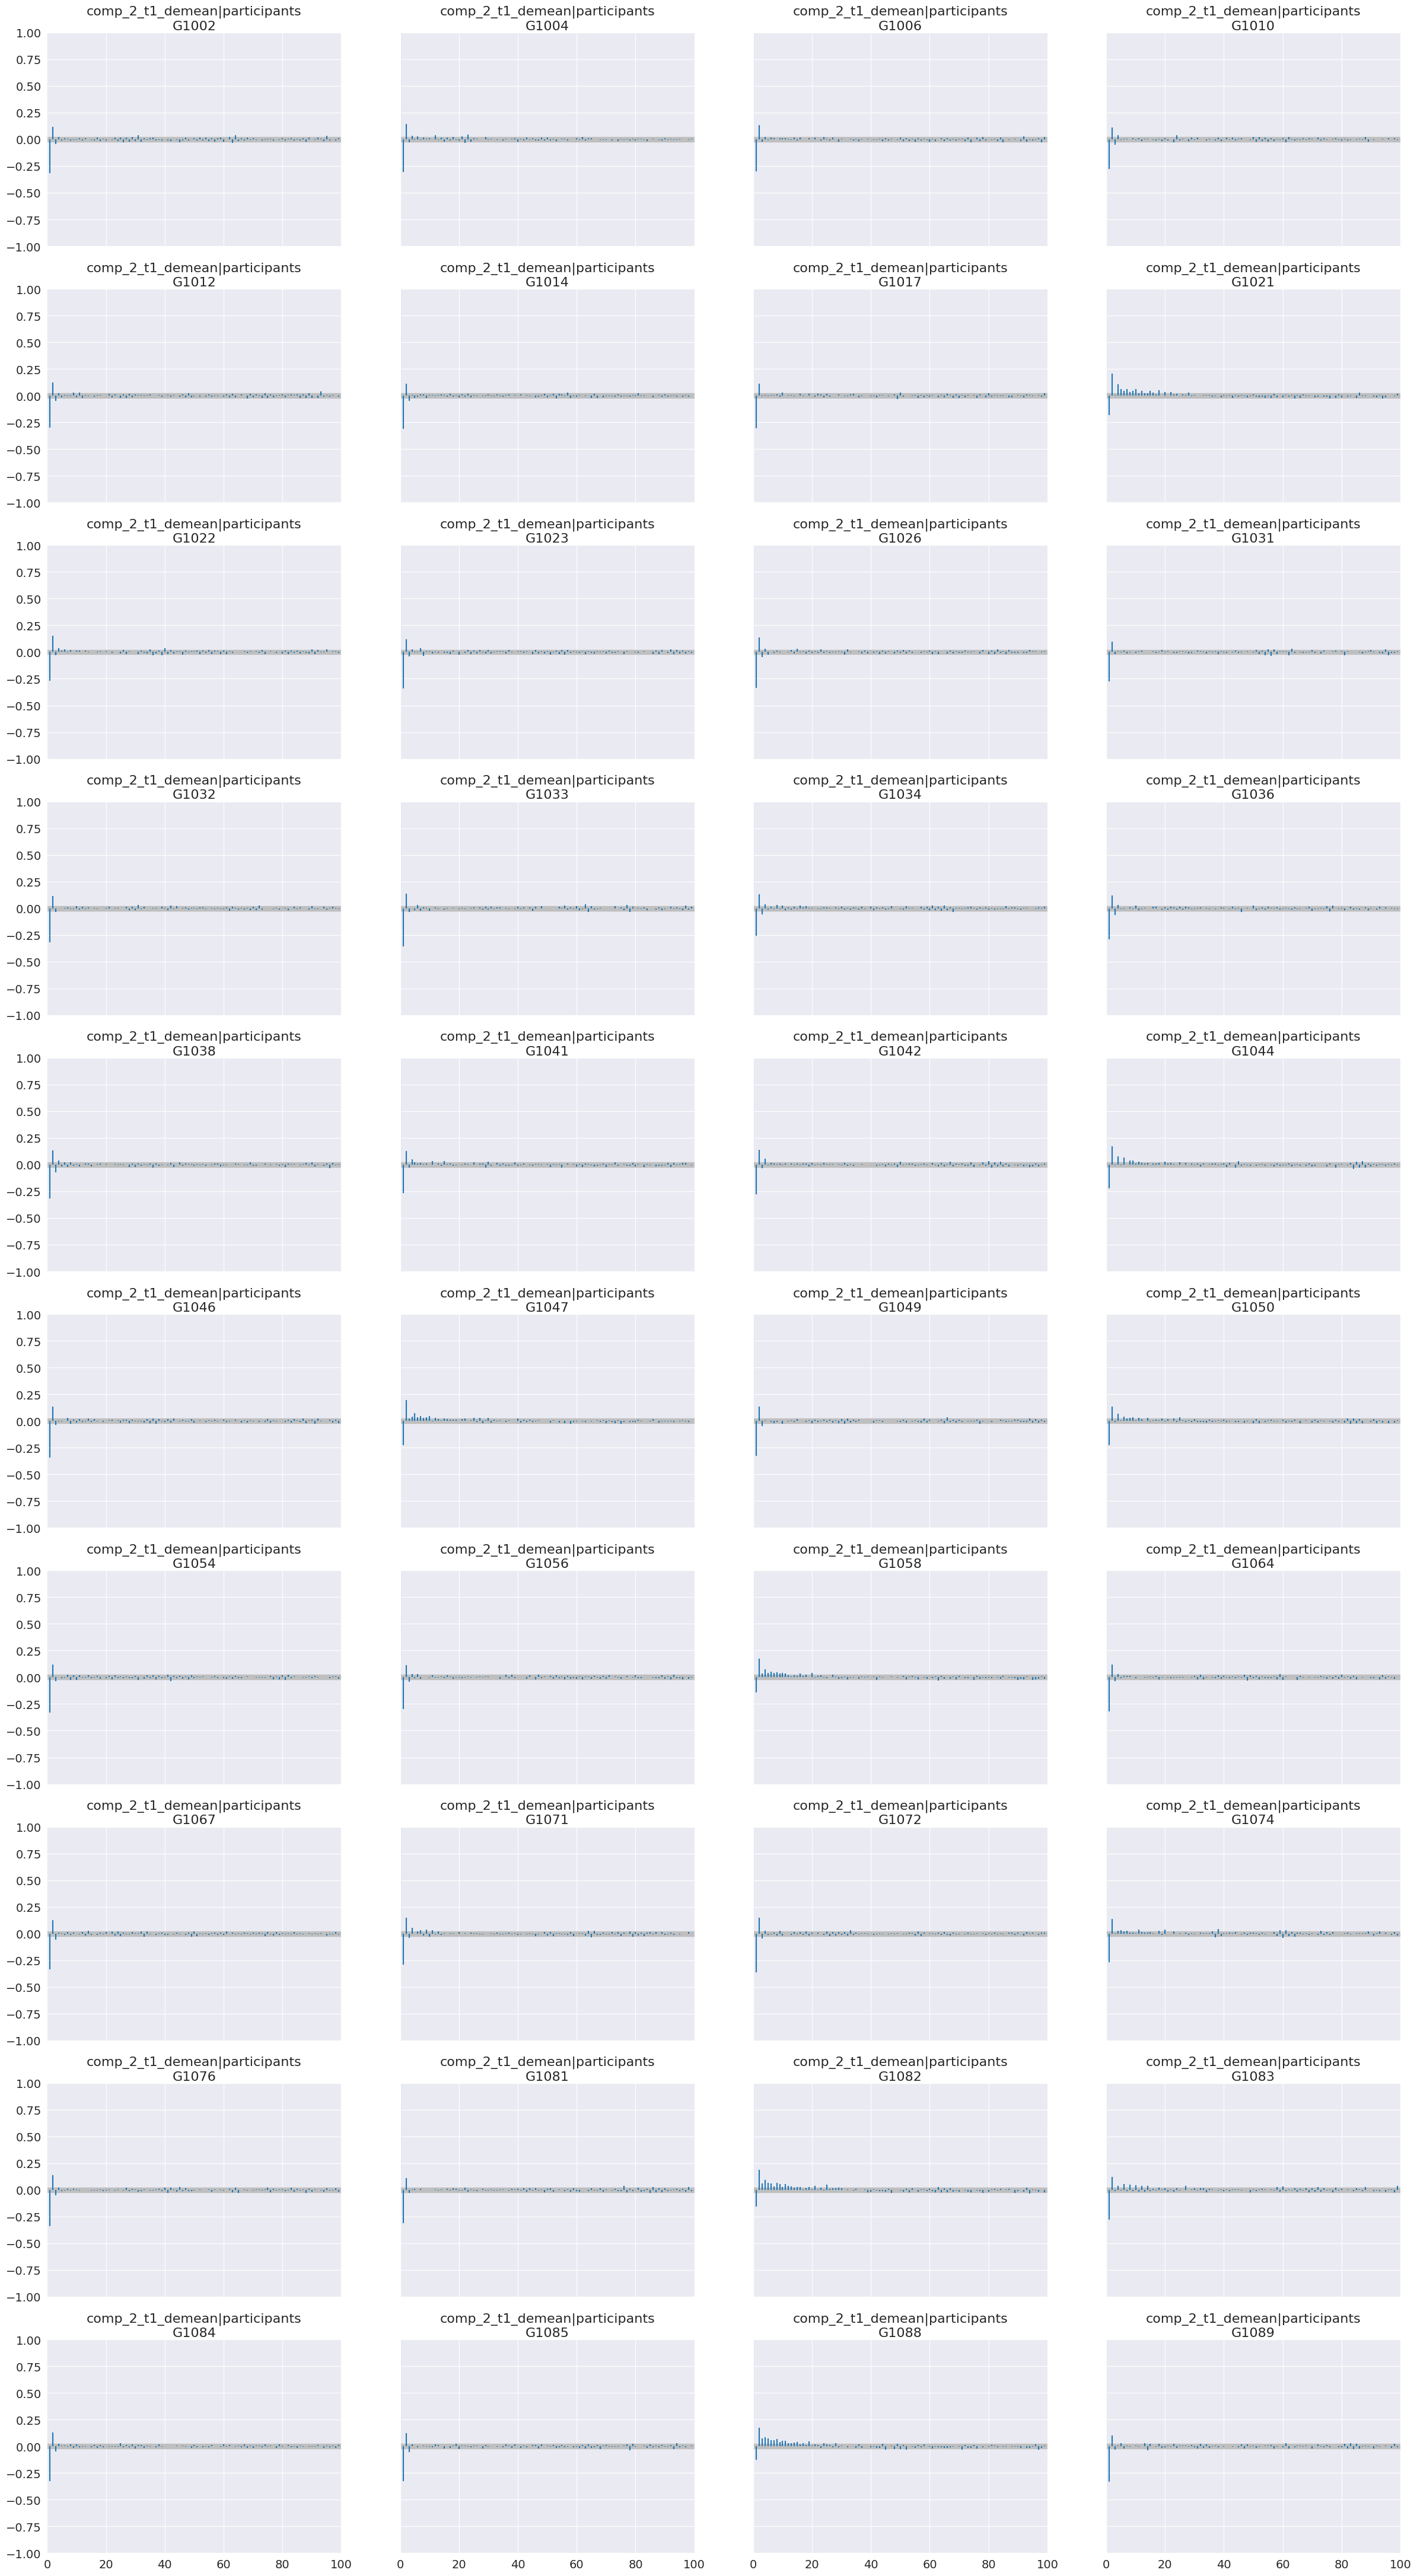

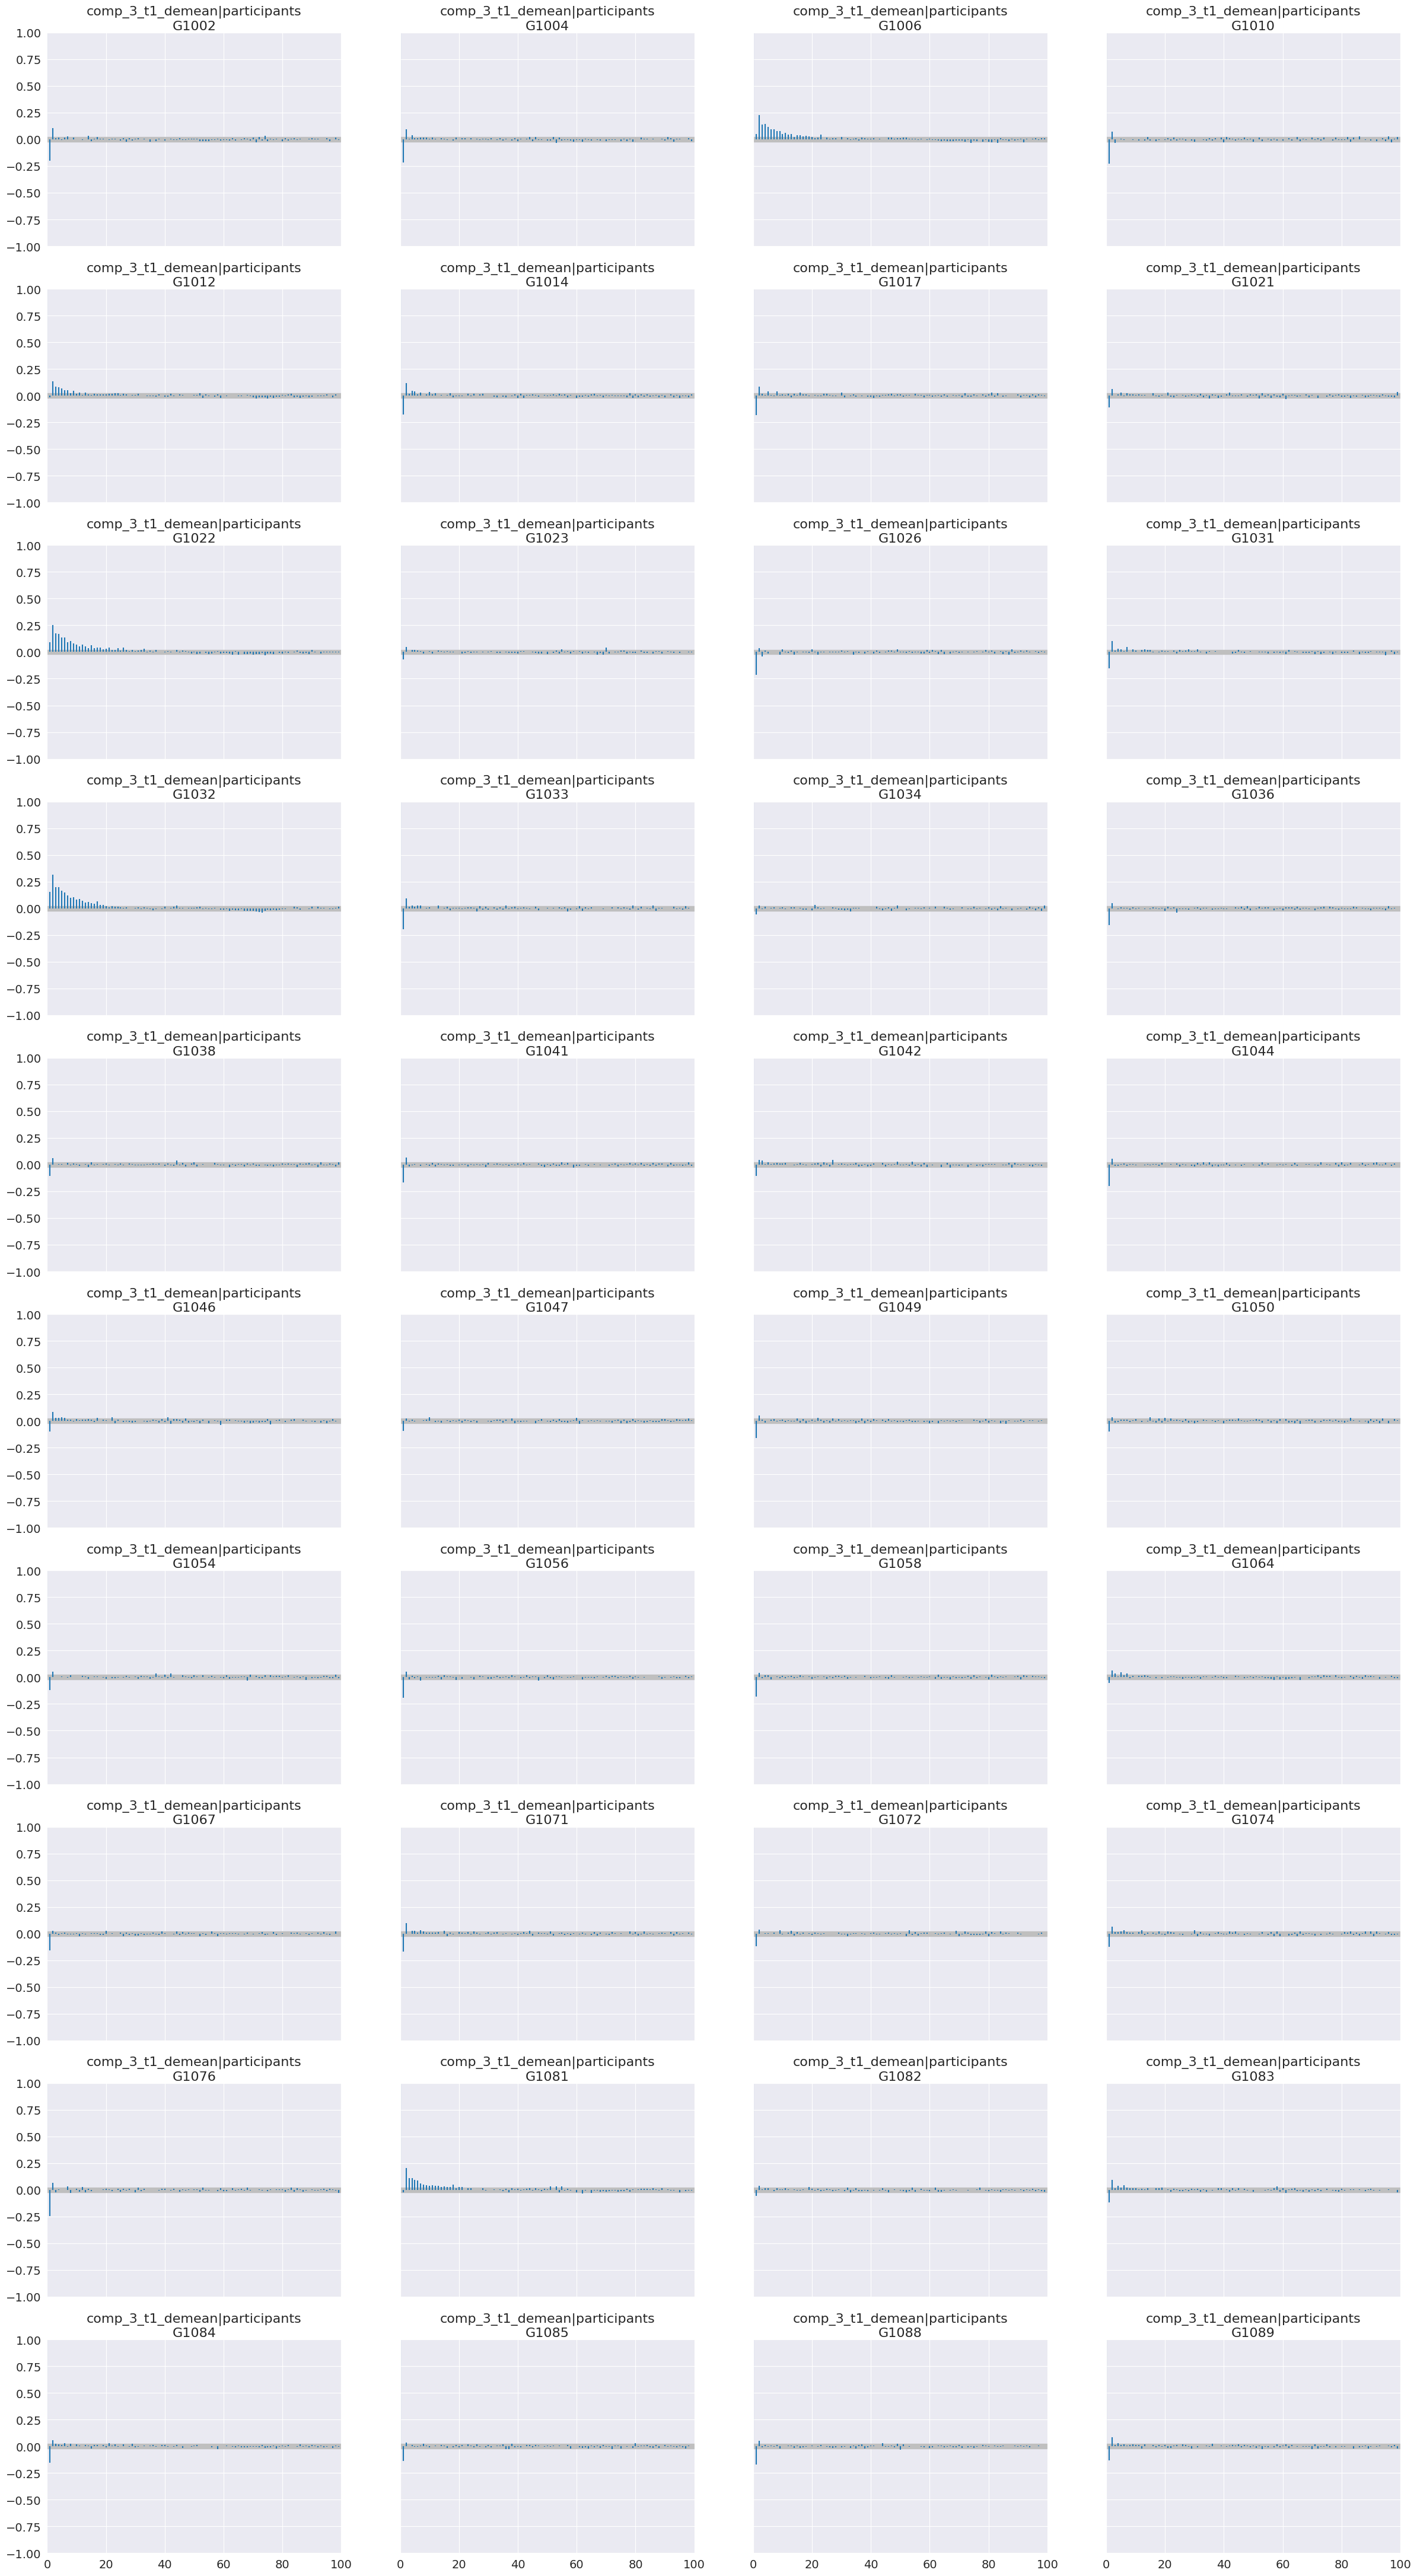

In [13]:
for model in comp:
    az.plot_autocorr(fitted_models['null'][model], combined=True)